# ml_sklearn[01]
- 첫날 머신러닝 내용
- 분류에대한 내용을 학습하고 교차검증을 통해서 검증

## 머신러닝 개념(ML)
- 데이터를 기반으로 패턴을 학습하고 결과를 추론하는 알고리즘 기법

- 지도학습(Supervised Learning) - 분류, 회귀, 
- 비지도학습(Un-Supervised Learning) - 군집화(클러스터링) , 차원축소(PCA)
- 강화학습(Reinforcement Learning)

## 지도학습 ( Supervised Learning - classification)
- step 01. 데이터세트 분리(학습 데이터, 테스트 데이터)
- step 02. 학습 데이터를 기반으로 ML 알고리즘을 적용해 학습 모델을 만든다 - fit()
- step 03. 분류예측을 수행(테스트 데이터) - predict()
- step 04. 평가

#### 분류(Classifier)
- DecisionTreeClassifier
- RandomForestClassifier
- GradientBoostingClassifier
- GaussianNB
- SVC

#### 회귀(Regressior)
- LinearRegression
- Ridge
- Lasso
- RandomForestRegression
- GradientBoostingRegression


#### 교차검증(Cross Validation)
- 과적합(overfitting)을 방지하기 위한 방법
- 데이터의 편중을 막기위해서
- 
- KFold 방식
- 
- 불균형한 분포도를 가진 레이블 데이터 집합을 위한 KFold 방식 -> Stratifield KFold 
- 레이블의 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습, 검증 데이터 세트로 분할
- 
- 아이리스 데이터를 이용해서 StratifiedKFold 교차 검증 진행해 보자 [실습]
- random_state = 100 
- StratifiedKFold 교차검증을(3, 5) 진행 후 평균 정확도를 확인
- 회귀 X , 분류 O
- 회귀에서 지원되지 않는 이유는 회귀는 연속된 숫자 값 때문이다
- 
- 위 과정을 한번에 수행해주는 함수가 존재 : cross_val_score(예측모델, 피처세트, 레이블, 성능평가 지표, 폴드 수)
- 위 과정을 절차는 폴드설정 -> 반복을 통해서 학습 및 테스트의 인덱스를 추출 -> 학습과 예측

# ml_sklearn[02]
- 교차검증 하이퍼파라미터를 이용한 최적의 모델을 만드는 방법
- 분류모델인 DecisionTree 설명
- 데이터 전처리와 피쳐 스케일링

#### 교차검증과 하이퍼파라미터를 이용한 최적의 모델을 만드는 방법

- GridSearchCV 를 이용한 파라미터 튜닝

##### DecisionTree 에서 사용할 수 있는 파라미터 (분류 )

- criterion : 분할 품질을 측정하는 기능 (default : gini)
- splitter : 각 노드에서 분할을 선택하는 데 사용되는 전략 (default : best)
- max_depth : 트리의 최대 깊이 (값이 클수록 모델의 복잡도가 올라간다.)
- min_samples_split : 자식 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
- min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1)
- min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
- max_features : 각 노드에서 분할에 사용할 특징의 최대 수
- random_state : 난수 seed 설정
- max_leaf_nodes : 리프 노드의 최대수
- min_impurity_decrease : 최소 불순도
- min_impurity_split : 나무 성장을 멈추기 위한 임계치
- class_weight : 클래스 가중치
- presort : 데이터 정렬 필요 여부

#### 갑자기 데이터 전처리

- 데이터 인코딩(ML 에서는 문자열 값을 입력값으로 허용하지 않는다) -> 숫자형 변환
- 방법) 레이블 인코딩 , 원-핫-인코딩 
- 주의사항) 회귀알고리즘에서는 적용 X , 트리계열의 알고리즘에서는 적용 O
- 트리계열의 알고리즘 중에서 성능이 떨어지는 단점이 있을 수 있다. 왜냐하면 - 숫자의 특성이 반영되기 때문에
-
- 입력값으로 결측값을 허용하지 않는다 -> 고정된 다른 값으로 변환
-
- 피처 스케일링 -> 정규화(0과 1사이의 값으로 변환 - MinMaxScalar) , 표준화(정규분포를 따르는 형식으로 평균이 0 분산 1 가우시안분포 변환 - StandardScalar)
- 
- LabelEncoder : fit() , transform()
- 문자열 피처를 숫자형 변환
-
- 결측값 처리
- 결측값을 시각화 시켜주는 패키지 : conda install -c conda-forge/label/cf202003 missingno

#### Feature Scaling

- 정규화(0과 1사이의 값으로 변환 - MinMaxScalar) (x - x최소값) / (x최대값 - x최소값) 만약 음수일 경우 1 대체됨, 
- 표준화(정규분포를 따르는 형식으로 평균이 0 분산 1 가우시안분포 변환 - StandardScalar)(x - x 평균값) / (x표준편차)
- 스케일링 전후의 정확도 비교까지

# ml_sklearn[03]
- 타이타닉 실습
1. 데이터로드
2. 결측값 처리
3. 성별에 따른 생존여부 확인위해 시각화
4. 전처리 - 레이블 인코딩( Sex , Cabin , Embarked )

#### 학습을 위한 준비
- step01 : feature  , label 데이터 셋 추출
- step02 : 데이터 분리
- step03 : 분류모델 선정 후 학습 -> DecisionTree , RandomForest , LogisticRegression 다 사용
- step04 : 예측
- step05 : 평가

- additinal 교차검증 추가(KFold , coross_val_score , GridSearchCV 를 이용한 하이퍼 파라미터 튜닝!!)
- 피처 중요도 확인


# ml_sklearn[04]

- 정확도란 - 실 데이터와 예측 데이터가 얼마나 같은지를 판단하는 지표
- 문제점 : 이진분류의 경우 모델의 성능을 왜곡할 수 있다..
- 왜? 데이터가 불균형한 경우 
- 해결책 : F1 Score (Precision , Recall)

이상한 그림들 보여주면서 설명

#### 분류모델 성능 평가를 위한 이해

이진분류표
제품을 생산하는 제조공장에서 품질 테스트를 실시하여 불량품을 찾아내고 불량품을 공자으로 돌려보낸다

품질 테스트의 결과가 양성 -> 불량품을 예측
                     음성 -> 정상제품으로 예측

TP : 불량으로 예측하고 실제 불량인것
TN : 정상으로 예측하고 실제 정상인것
FN : 정상으로 예측하고 실제 불량인것
FP : 불량으로 예측하고 실제 정상인것

                     불량예측          정상예측
불량품                 TP                FN
정상제품               FP                TN  


- 정밀도(Precision) : TP / (FP + TP)
- : 예측을 Positive로 한 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율
- 재현율(Recall) : TP / (FN + TP)
- : 실제 값이 Positive인 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율
-
-
- 상대적으로 정밀도가 더 중요한 지표인 경우 : 스팸 메일
- 상대적으로 재현율이 더 중요한 지표인 경우 : 의학(암 진단) , 금융(사기 판별)  



#### 정밀도와 재현율을 임의로 조정하는 모델을 생성해야할 경우가 있다

- 정밀도와 재현율의 맹점이 있으므로 상호 보완할 수 있는 지점이 필요하다 - trade_off
- 임계값(threshold)을 조절해서 default : 0.5  ,      0 < default < 1
- Binarizer - fit_transform()
- 분류 결정 임계값이 낮아질수록 Positive로 예측할 확률이 높아지게 된다(재현률이 증가) 

- predict_proba() 통해서 개별 레이블별 예측확률을 반환받아야 한다

# ml_sklearn[05]

- 4에서 배운내용으로 다시 분류모델 실습

# ml_sklearn[06]

- 앙상블 학습
- 단일 강한 알고리즘보다 , 복수의 약한 알고리즘이 더 뛰어날 수 있다는 생각에 기반
- 앙상블 학습 유형은 보팅 배깅 부스팅 스태킹

#### XGBoost
- 트리 기반의 알고리즘의 앙상블 학습에서 각광받는 알고리즘 중 하나
- GBM 기반이지만 단점인 느린 수행시간 , 과적합 규제 등을 해결한 알고리즘

# ml_sklearn[07]

- 드디어 회귀 분류만 1-6일 배움
- 회귀란 종속변수(target)와 하나 이상의 독립변수(feature)간의 관계를 모델링하는 선형 또는 비선형 접근법

#### linear Regression (선형 회귀)

* f(x) = wx + b 
* 예측함수를 통해서 예측값과 실제값의 차이를 계산
* cost(w,b) - 업데이트를 통해서 w,b 값을 조정
* 위 과정을 특정 횟수만큼 반복
* 수정된 f(x) = wx + b 
* 독립변수 또는 설명변수 -> feature , 종속변수 -> target(수치형)
* 독립변수 개수의 따라서 : 단일회귀 , 다중회귀(우리가 써야할 회귀)

#### 주택 임대료 예측 모델
- manhattan.csv
- https://github.com/Codecademy/datasets/blob/master/streeteasy/manhattan.csv

#### RMSE 예측 
- MSE 에 Root 를 씌운 것

# ml_sklearn[08]

- UnSupervised - cluster(군집화)


### 진행절차
#### step01. 데이터 전처리 - (지역, 코드 , 유형, 주야)
#### step02. 군집모형생성 - 분석에 사용할 피처는 과학고, 외고국제고, 자사고 진학률
#### step03. 표준화
#### step04. 모형 객체 생성
#### step05. 모형 학습
#### step06. 예측
#### step07. 예측 결과를 데이터 프레임에 추가
#### step08. 클러스터 값으로 그룹화, 그룹별 내용 출력
#### step09. 지도 그래프 시각화

# ml_tensor_keras[01]

#### 다층 퍼셉트론(MLP)
- 입력층 - 은닉층 - 출력층
- 회귀에 적용한다면 - 

# ml_tensor_keras[02]

#### 학습모델 개선하는 방법
- Weight Initialization
- Activation Function
- Optimizer
- BatchNormalization
- Dropout

#### 가중치 초기화
- LeCun
- Xaiver
- He-Normal

#### 배치 정규화
- 평균 0 , 분산 1 정규화를 통해서 학습이 잘 일어나도록 도와주는 방식
- 각 피처별 배치정규화를 진행

#### Dropout
- 과대적합(overffiting)을 방지하기 위한 방법이다
- 배치정규화를 적용하면 내부적으로 규제(regularization) 를 포함하고 있어서 드롭아웃을 적용할 필요가 없다
- 학습정확도가 100%라고 해서 테스트정확도가 높지 않을 수 있다

#### Ensemble



-- 위까지 배운이론들

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

import seaborn as sns
from matplotlib import rcParams

In [195]:
# cer_data 안에 모든 csv 파일 경로 list 형식
file_path = glob('cer_data/*2.csv')
print(file_path)
all_file = []
for path in file_path:
    csvfile = pd.read_csv(path  , sep=',',index_col=False)
    all_file.append(csvfile)
# csv파일들 전부 합침
all_data = pd.concat(all_file, ignore_index=True)
all_data

['cer_data\\total_co2.csv']


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,11092.6750,11576.7190,12713.4890,12178.1070,11840.7430,10623.2990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (kt),EN.ATM.CO2E.KT,118545.9013,123758.9033,128093.8978,132810.3325,144345.3524,155803.7801,...,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.3710,491.3780,689.3960,707.7310,839.7430,1008.4250,...,12260.0000,10450.0000,8510.000,7810.000,7990.000,7390.000,7380.0000,7440.0000,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (kt),EN.ATM.CO2E.KT,8760.4630,9376.5190,9710.2160,11540.0490,13985.9380,19827.4690,...,179070.0000,181740.0000,191990.000,198440.000,193060.000,195120.000,201900.0000,224380.0000,NaN,NaN
4,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,550.0500,454.7080,1180.7740,1151.4380,1224.7780,1188.1080,...,29460.0000,30250.0000,32820.000,34630.000,35160.000,35410.000,30840.0000,27340.0000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,CO2 emissions (kt),EN.ATM.CO2E.KT,58.6720,73.3400,69.6730,80.6740,99.0090,102.6760,...,20690.0000,19680.0000,26350.000,26710.000,14210.000,10880.000,10060.0000,9310.0000,NaN,NaN
263,South Africa,ZAF,CO2 emissions (kt),EN.ATM.CO2E.KT,97934.5690,102213.9580,105767.2810,109826.6500,119657.8770,128260.6590,...,409120.0000,426710.0000,436870.000,447980.000,424880.000,425180.000,435140.0000,433250.0000,NaN,NaN
264,Zambia,ZMB,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,3278.2980,3916.3560,...,3060.0000,4020.0000,4240.000,4800.000,5070.000,5590.000,6990.0000,7740.0000,NaN,NaN


In [196]:
kor_co2 = all_data[all_data['Country Code'] == 'KOR']
kor_co2

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
126,"Korea, Rep.",KOR,CO2 emissions (kt),EN.ATM.CO2E.KT,12552.141,14462.648,17278.904,21103.585,22218.353,25005.273,...,597290.0,598960.0,597640.0,586000.0,606510.0,614780.0,625350.0,630870.0,NaN,NaN


In [36]:
file_path = glob('cer_data/*.csv')
display(file_path)
csvfile_1 = pd.read_csv(file_path[1]  , sep=',',index_col=False ,  encoding='euc-kr')
csvfile_2 = pd.read_csv(file_path[2]  , sep=',',index_col=False,  encoding='euc-kr')
display(csvfile_1)
display(csvfile_2)

['cer_data\\kor_co2.csv',
 'cer_data\\업체별_온실가스사용량_탄소배출량_전처리_1120 (1) (1).csv',
 'cer_data\\온실가스 배출량(에너지,산업공정,농업,폐기물,증감율).csv',
 'cer_data\\탄소배출권시세20150112_20151014.csv',
 'cer_data\\탄소배출권시세20151015_20161014.csv',
 'cer_data\\탄소배출권시세20161015_20171014.csv',
 'cer_data\\탄소배출권시세20171015_20181014.csv',
 'cer_data\\탄소배출권시세20181015_20191014.csv',
 'cer_data\\탄소배출권시세20191015_20201014.csv',
 'cer_data\\탄소배출권시세20201015_20211015.csv']

,대상연도,할당여부,업체명,업종명,온실가스 배출량,에너지 사용량,대상연도.1,최종분류
0,2012,NaN,(유) 스태츠 칩팩코리아,반도체.디스플레이.전기전자,78478,1599,2012,산업
1,2011,NaN,(유) 스태츠 칩팩코리아,반도체.디스플레이.전기전자,75454,1447,2011,산업
2,2020,할당,(유)에스케이씨에보닉페록사이드코리아,산업,55013,1117,2020,산업
3,2019,할당,(유)에스케이씨에보닉페록사이드코리아,석유화학,53950,1124,2019,산업
4,2018,할당,(유)에스케이씨에보닉페록사이드코리아,석유화학,58372,1191,2018,산업
...,...,...,...,...,...,...,...,...
8299,2015,NaN,희성전자(주) 대구공장,반도체.디스플레이.전기전자,13826,282,2015,산업
8300,2014,NaN,희성전자(주) 대구공장,반도체.디스플레이.전기전자,16714,341,2014,산업
8301,2020,목표,희성촉매(주),석유화학,20033,397,2020,산업
8302,2019,목표,희성촉매(주),석유화학,20476,410,2019,산업


,통계표명:,국가 온실가스 통계,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,단위:,백만톤 CO₂eq.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1990,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
2,총배출량,292.2,315.5,343.5,378.7,403.7,433.9,470.5,502.1,431.5,...,598.0,656.3,684.9,688.3,697.4,691.9,692.5,693.5,709.8,727.6
3,순배출량,254.4,281.9,310.9,347.9,370.8,403.0,436.1,463.1,383.9,...,541.6,602.5,632.3,641.3,654.8,648.7,648.2,648.0,668.3,686.3
4,-?에너지,240.4,258.2,279.1,308.7,328.0,352.2,385.8,411.9,351.7,...,513.1,566.1,595.1,596.5,605.0,597.4,600.7,602.7,615.7,632.4
5,-?산업공정,20.4,24.4,30.0,34.4,38.7,43.1,44.8,49.6,40.8,...,47.8,53.0,52.9,54.4,54.8,57.5,54.3,53.2,55.9,57.0
6,-?농업,21.0,21.2,21.6,22.1,22.6,22.8,23.3,23.3,23.1,...,21.7,22.1,21.1,21.5,21.3,21.4,21.0,20.8,21.0,21.2
7,-?LULUCF,-37.8,-33.6,-32.6,-30.8,-32.9,-30.9,-34.4,-39.0,-47.6,...,-56.4,-53.8,-52.6,-47.0,-42.5,-43.3,-44.4,-45.6,-41.5,-41.3
8,-?폐기물,10.4,11.6,12.7,13.5,14.4,15.8,16.5,17.3,16.0,...,15.5,15.2,15.8,15.9,16.2,15.6,16.6,16.8,17.2,17.1
9,총배출량?증감률(%),0.0,8.0,8.9,10.2,6.6,7.5,8.4,6.7,-14.1,...,0.7,9.8,4.4,0.5,1.3,-0.8,0.1,0.1,2.3,2.5


In [197]:
kor_co2 = kor_co2.transpose()

In [198]:
kor_co2.rename(columns=kor_co2.iloc[0],inplace=True)
kor_co2 = kor_co2.drop(kor_co2.index[0])
kor_co2

,"Korea, Rep."
Country Code,KOR
Indicator Name,CO2 emissions (kt)
Indicator Code,EN.ATM.CO2E.KT
1960,12552.1
1961,14462.6
...,...
2016,614780
2017,625350
2018,630870
2019,NaN


In [199]:
kor_co2.columns
kor_co2.rename(columns = {'EN.ATM.CO2E.PC' : 'em'} , inplace = True)
kor_co2.columns

Index(['Korea, Rep.'], dtype='object')

In [200]:
display(kor_co2.describe())
display(kor_co2)
display(kor_co2.isnull().sum())
kor_co2.dropna(inplace = True)
display(kor_co2)
kor_co2 = kor_co2.reset_index()
display(kor_co2)

,"Korea, Rep."
count,62.000
unique,62.000
top,14462.648
freq,1.000


,"Korea, Rep."
Country Code,KOR
Indicator Name,CO2 emissions (kt)
Indicator Code,EN.ATM.CO2E.KT
1960,12552.1
1961,14462.6
...,...
2016,614780
2017,625350
2018,630870
2019,NaN


Korea, Rep.    2
dtype: int64

,"Korea, Rep."
Country Code,KOR
Indicator Name,CO2 emissions (kt)
Indicator Code,EN.ATM.CO2E.KT
1960,12552.1
1961,14462.6
...,...
2014,586000
2015,606510
2016,614780
2017,625350


,index,"Korea, Rep."
0,Country Code,KOR
1,Indicator Name,CO2 emissions (kt)
2,Indicator Code,EN.ATM.CO2E.KT
3,1960,12552.1
4,1961,14462.6
...,...,...
57,2014,586000
58,2015,606510
59,2016,614780
60,2017,625350


In [81]:
kor_co2.info()
kor_co2.em = kor_co2.em.astype('float')
display(kor_co2.info())
kor_co2['index'] = pd.to_datetime(kor_co2['index'], format='%Y')
display(kor_co2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   59 non-null     datetime64[ns]
 1   em      59 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   59 non-null     datetime64[ns]
 1   em      59 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   59 non-null     datetime64[ns]
 1   em      59 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 KB


None

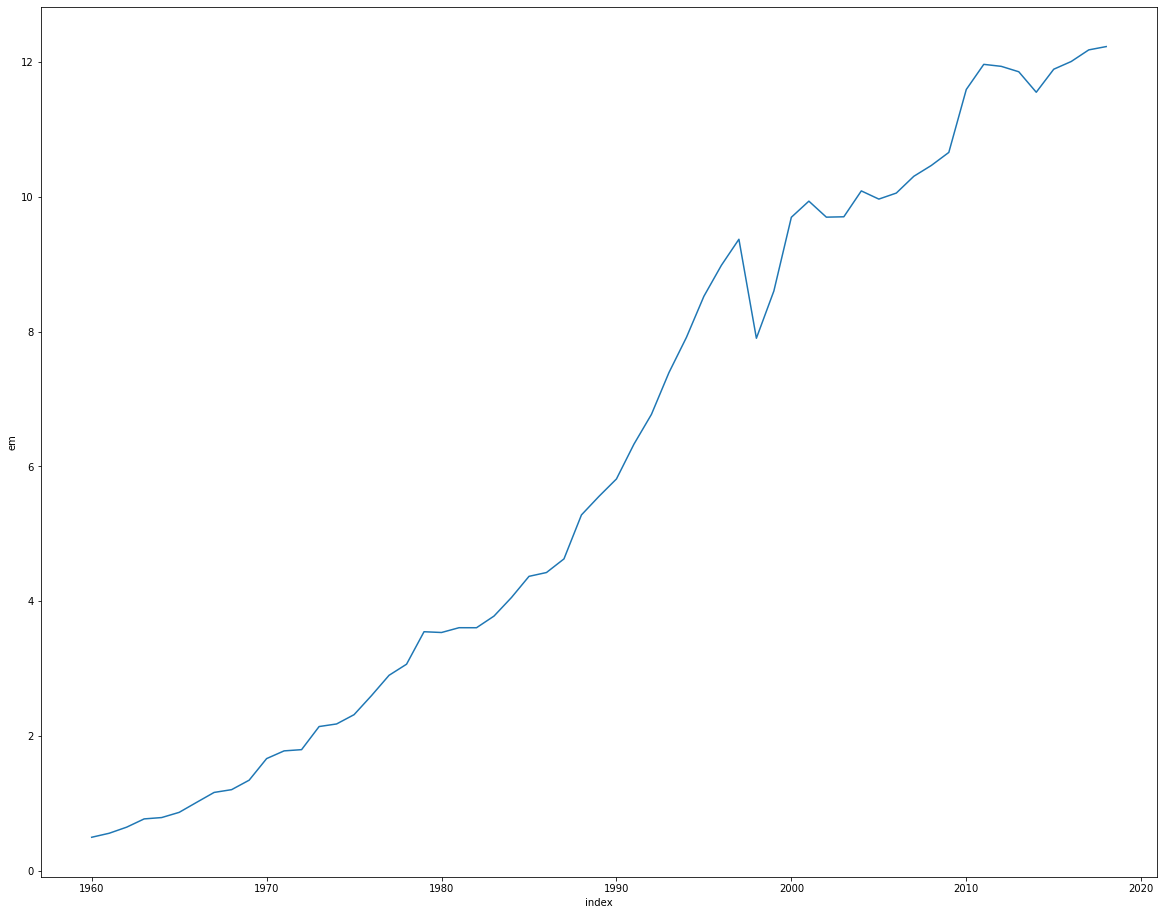

In [82]:
sns.lineplot(x = 'index',
             y='em', 
             data=kor_co2)
plt.show()

In [92]:
kor_co2.describe()
kor_co2['index'] = pd.to_numeric(pd.to_datetime(kor_co2['index']))

In [93]:
from sklearn.metrics import mean_squared_error
from math import sqrt

X = kor_co2.values
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    
    obs = test[i]
    history.append(obs)
    print(yhat, obs)

mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

[5.67993600e+17 5.28082935e+00] [5.99616000e+17 5.55599804e+00]
[5.99616000e+17 5.55599804e+00] [6.31152000e+17 5.81418635e+00]
[6.31152000e+17 5.81418635e+00] [6.62688000e+17 6.32949634e+00]
[6.62688000e+17 6.32949634e+00] [6.94224000e+17 6.77082969e+00]
[6.94224000e+17 6.77082969e+00] [7.25846400e+17 7.39071726e+00]
[7.25846400e+17 7.39071726e+00] [7.57382400e+17 7.91258545e+00]
[7.57382400e+17 7.91258545e+00] [7.88918400e+17 8.52261053e+00]
[7.88918400e+17 8.52261053e+00] [8.2045440e+17 8.9815017e+00]
[8.2045440e+17 8.9815017e+00] [8.52076800e+17 9.36771412e+00]
[8.52076800e+17 9.36771412e+00] [8.83612800e+17 7.90014316e+00]
[8.83612800e+17 7.90014316e+00] [9.15148800e+17 8.60078465e+00]
[9.15148800e+17 8.60078465e+00] [9.466848e+17 9.693859e+00]
[9.466848e+17 9.693859e+00] [9.78307200e+17 9.93283452e+00]
[9.78307200e+17 9.93283452e+00] [1.0098432e+18 9.6955097e+00]
[1.0098432e+18 9.6955097e+00] [1.04137920e+18 9.70113586e+00]
[1.04137920e+18 9.70113586e+00] [1.07291520e+18 1.008474

In [94]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(kor_co2.em.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   58
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -16.916
Method:                       css-mle   S.D. of innovations              0.323
Date:                Tue, 02 Nov 2021   AIC                             45.832
Time:                        17:48:38   BIC                             58.194
Sample:                             1   HQIC                            50.647
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.036      5.608      0.000       0.132       0.274
ar.L1.D.y      0.0455      0.471      0.096      0.923      -0.878       0.969
ar.L2.D.y     -0.4389      0.382     -1.148      0.2

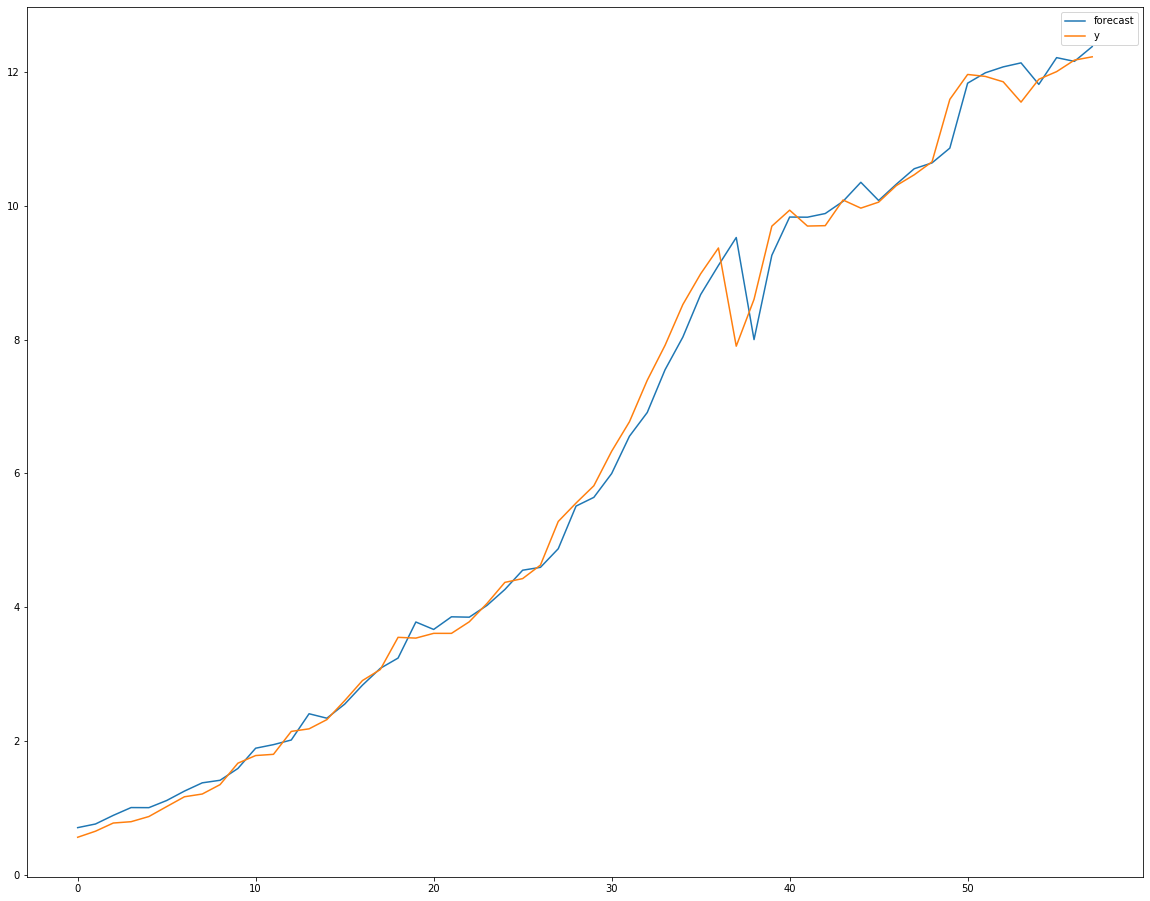

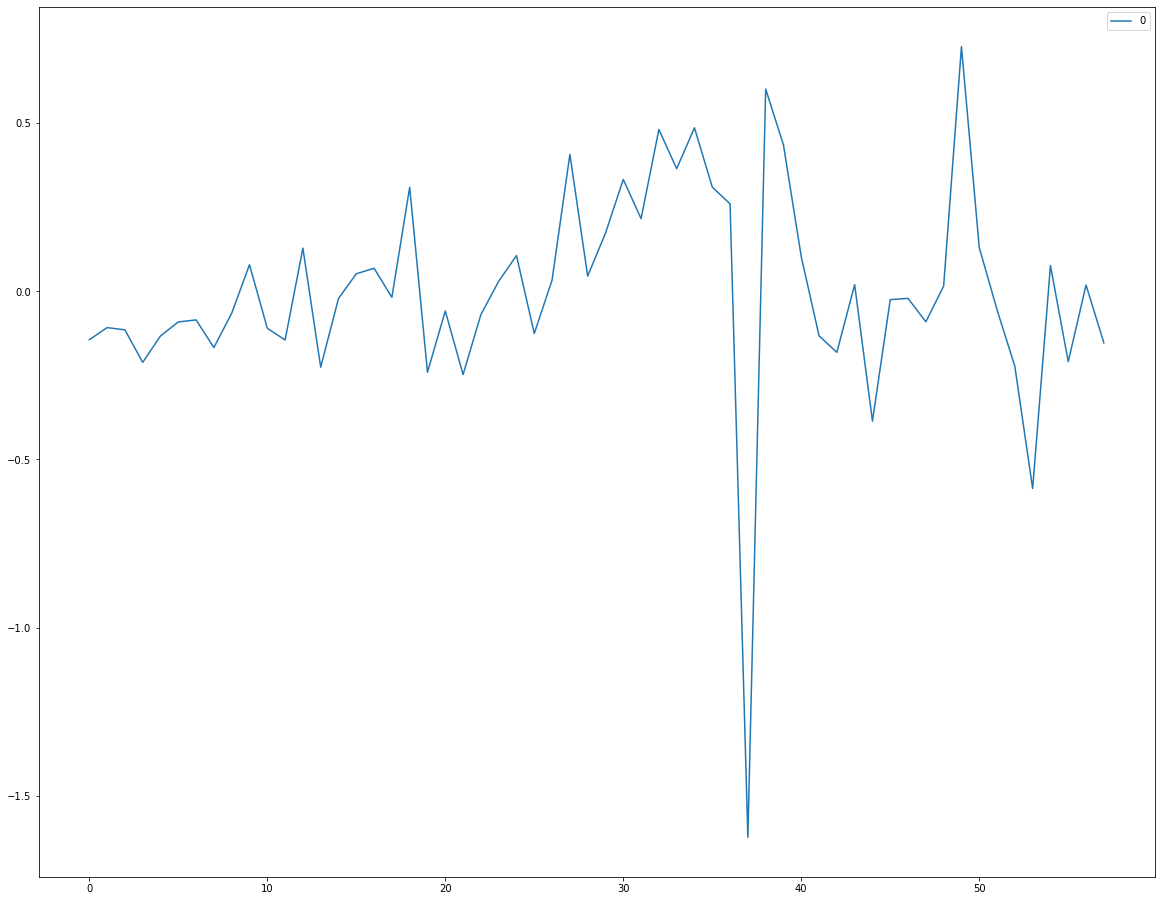

In [95]:
fig = model_fit.plot_predict() # 학습 데이터에 대한 예측 결과입니다. (첫번째 그래프)
residuals = pd.DataFrame(model_fit.resid) # 잔차의 변동을 시각화합니다. (두번째 그래프)
residuals.plot()

연도별 총배출량 추세를 살펴보면, 1990년부터 1997년까지는 연평균 8.1%의 가파른 증가 추세를
보였으나 1998년 외환위기 영향으로 온실가스 배출량도 전년 대비 14.1% 감소하였다. 2000년대에는
경기가 회복되면서 GDP와 온실가스 배출량이 함께 증가하는 경향을 보였다. 다만, 2000년대 들어서는
배출량 증가폭이 상당히 둔화되었으며, 2013년13) 이후에는 크게 증감하지 않고 안정적인 배출 추세를
유지하게 되었다. 

In [130]:
csvfile_1 = pd.read_csv(file_path[4]  , sep=',',index_col=False ,  encoding='euc-kr')
display(csvfile_1.info())
csvfile_1.groupby(['대상연도']).sum()[['온실가스 배출량' , '에너지 사용량']]
co2_energy_data = csvfile_1.groupby(['대상연도']).sum()[['온실가스 배출량' , '에너지 사용량']]
co2_energy_data
# 기업별 에너지사용량 온실가스 배출량 합계


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8304 entries, 0 to 8303
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   대상연도      8304 non-null   int64 
 1   할당여부      4067 non-null   object
 2   업체명       8304 non-null   object
 3   업종명       8304 non-null   object
 4   온실가스 배출량  8304 non-null   int64 
 5   에너지 사용량   8304 non-null   int64 
 6   대상연도.1    8304 non-null   int64 
 7   최종분류      8304 non-null   object
dtypes: int64(4), object(4)
memory usage: 519.1+ KB


None

,온실가스 배출량,에너지 사용량
대상연도,,
2011,544070321,7048117
2012,565063082,7408773
2013,577147576,7482840
2014,600839366,7198148
2015,593427174,7294542
2016,605402628,7433731
2017,633629552,7566656
2018,650768199,8104980
2019,627035506,7588486


In [111]:
# cer_data 안에 모든 csv 파일 경로 list 형식
file_path = glob('cer_data/*.csv')
display(file_path)
#gdp data
gdp_data = pd.read_csv(file_path[1]  , sep='\t',index_col=False)
display(gdp_data)
#최종에너지 소비량
co2_pergdp_data = pd.read_csv(file_path[6]  , sep=',' , index_col=False , encoding = 'cp949')
display(co2_pergdp_data)

['cer_data\\GDP 성장률.csv',
 'cer_data\\GDP.csv',
 'cer_data\\GDP당 탄소배출량.csv',
 'cer_data\\kor_co2.csv',
 'cer_data\\업체별_온실가스사용량_탄소배출량_전처리_1120 (1) (1).csv',
 'cer_data\\온실가스 배출량(에너지,산업공정,농업,폐기물,증감율).csv',
 'cer_data\\최종에너지_소비_고유단위__20211103003143.csv',
 'cer_data\\탄소배출권시세20150112_20151014.csv',
 'cer_data\\탄소배출권시세20151015_20161014.csv',
 'cer_data\\탄소배출권시세20161015_20171014.csv',
 'cer_data\\탄소배출권시세20171015_20181014.csv',
 'cer_data\\탄소배출권시세20181015_20191014.csv',
 'cer_data\\탄소배출권시세20191015_20201014.csv',
 'cer_data\\탄소배출권시세20201015_20211015.csv']

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.934248e+10,1.975349e+10,2.152662e+10,2.577236e+10,2.356323e+10,2.685135e+10,...,8.986050e+11,9.155900e+11,9.300860e+11,9.588250e+11,8.954400e+11,8.569920e+11,9.647910e+11,9.866110e+11,9.803720e+11,9.008290e+11
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,1.980707e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040732e+10,1.113130e+10,1.194684e+10,1.268022e+10,1.384262e+10,1.486682e+10,...,6.584280e+11,7.169350e+11,8.078190e+11,8.469430e+11,7.574920e+11,6.874850e+11,6.809890e+11,7.381310e+11,7.920790e+11,7.865850e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,8.941719e+10,6.230691e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.701698e+09,6.499807e+09,7.074778e+09,7.396705e+09,6.442916e+09,6.719172e+09,7.245707e+09,7.942962e+09,7.953156e+09,7.611402e+09
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.093383e+10,2.673614e+10,2.348627e+10,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575397e+09,7.972997e+09,8.497997e+09,9.423396e+09,1.037400e+10,1.133440e+10,...,4.164190e+11,3.963330e+11,3.668290e+11,3.509050e+11,3.176210e+11,2.963570e+11,3.495540e+11,3.682890e+11,3.514320e+11,3.019240e+11
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631164e+10,2.330869e+10,1.932005e+10


,시점,석탄 (천ton),석탄 (천ton).1,석탄 (천ton).2,석유 (천bbl),석유 (천bbl).1,석유 (천bbl).2,석유 (천bbl).3,천연가스 (천ton),도시가스 (백만㎥),전력 (GWh),열에너지 (천toe),신재생 및 기타 (천toe)
0,시점,소계,무연탄,유연탄,소계,에너지유,LPG,비에너지유,소계,소계,소계,소계,소계
1,1981,26970,19536,7434,131229.717,103732.334,4851.871,22645.512,0,21,35424.31,-,2492
2,1982,27042,18539,8503,128897.507,99607.048,7080.251,22210.208,0,25,37880.103,-,2417.24
3,1983,28708,19621,9087,140176.328,104859.023,9718.467,25598.838,0,34,42620.164,-,2377.76
4,1984,31411,22008,9403,152559.017,112363.344,11996.449,28199.224,0,46.909,47050.651,-,2492
5,1985,33614.896,24058,9556.896,159929,117008.423,13804.042,29116.535,0,76.527,50732.566,-,2031.4
6,1986,35230.097,25303,9927.097,179142.036,129644.745,16938.354,32558.937,0,120.273,56310.011,-,1480.36
7,1987,36418.412,24641.984,11776.428,202088,146763.9,20696.7,34627.4,0,180.982,64169,10.4,1318.52
8,1988,37920.186,24225,13695.186,231911.2,169311.8,25207.6,37391.8,0,308.091,74317,62.5,1163.68
9,1989,36472.813,21232,15240.813,263973.7,197112,29101,37760.7,0,589.9,82192,70.879,1032.64


In [156]:
# gdp 데이터 전처리
gdp_data_kor = gdp_data[gdp_data['Country Code'] == 'KOR']
gdp_data_kor = gdp_data_kor.transpose()
gdp_data_kor_1 = gdp_data_kor.drop(['Country Name' , 'Indicator Name' , 'Indicator Code','Country Code'])
gdp_data_kor_1 = gdp_data_kor_1.reset_index()
#display(gdp_data_kor_1)
gdp_data_kor_1.rename(columns = {'index':'대상연도' , 126 :'gdp_value'},inplace = True)
gdp_data_kor_1

,대상연도,gdp_value
0,1960,3.95819e+09
1,1961,2.41756e+09
2,1962,2.81432e+09
3,1963,3.98878e+09
4,1964,3.45894e+09
...,...,...
56,2016,1.50011e+12
57,2017,1.6239e+12
58,2018,1.72485e+12
59,2019,1.64674e+12


In [209]:
# 1960 2020 co2 데이터 전처리
kor_co2 = all_data[all_data['Country Code'] == 'KOR']
kor_co2
kor_co2 = kor_co2[kor_co2['Country Code'] == 'KOR']
kor_co2 = kor_co2.transpose()
kor_co2 = kor_co2.drop(['Country Name' , 'Indicator Name' , 'Indicator Code','Country Code'])
kor_co2 = kor_co2.reset_index()
#display(gdp_data_kor_1)
kor_co2.rename(columns = {'index':'대상연도' , 126 :'co2_value'},inplace = True)
kor_co2.loc[59]['co2_value'] = 627035 # 업체별 데이터에서 추출
kor_co2

,대상연도,co2_value
0,1960,12552.1
1,1961,14462.6
2,1962,17278.9
3,1963,21103.6
4,1964,22218.4
...,...,...
56,2016,614780
57,2017,625350
58,2018,630870
59,2019,627035


In [185]:
energy_data = pd.read_csv(file_path[6]  , sep=',' , index_col=False , encoding = 'cp949')
#display(energy_data)
energy_data.rename(columns = {'시점' : '대상연도',
                              '석탄 (천ton)':'석탄합(천ton)' , 
                              '석탄 (천ton).1' :'무연탄',
                              '석탄 (천ton).2' : '유연탄',
                              '석유 (천bbl)' : '석유합(천ton)',
                              '석유 (천bbl).1' : '에너지유',
                              '석유 (천bbl).2' : 'LPG',
                              '석유 (천bbl).3' : '비에너지유',
                              
                             },inplace = True)
energy_data = energy_data.drop([0])
energy_data = energy_data.set_index('대상연도')
energy_data.info()
energy_data_1 = energy_data[['석탄합(천ton)' , '석유합(천ton)' , '천연가스 (천ton)' , '전력 (GWh)' , '열에너지 (천toe)' , '신재생 및 기타 (천toe)']]
energy_data_1 = energy_data_1.astype(float)
energy_data_1.info()
display(energy_data_1)

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 1981 to 2019
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   석탄합(천ton)        39 non-null     object
 1   무연탄              39 non-null     object
 2   유연탄              39 non-null     object
 3   석유합(천ton)        39 non-null     object
 4   에너지유             39 non-null     object
 5   LPG              39 non-null     object
 6   비에너지유            39 non-null     object
 7   천연가스 (천ton)      39 non-null     object
 8   도시가스 (백만㎥)       39 non-null     object
 9   전력 (GWh)         39 non-null     object
 10  열에너지 (천toe)      39 non-null     object
 11  신재생 및 기타 (천toe)  39 non-null     object
dtypes: object(12)
memory usage: 4.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 1981 to 2019
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   석탄합(천ton)        39 non-nul

,석탄합(천ton),석유합(천ton),천연가스 (천ton),전력 (GWh),열에너지 (천toe),신재생 및 기타 (천toe)
대상연도,,,,,,
1981,26970.0,131230.0,0.0,35424.0,0.0,2492.0
1982,27042.0,128898.0,0.0,37880.0,0.0,2417.0
1983,28708.0,140176.0,0.0,42620.0,0.0,2378.0
1984,31411.0,152559.0,0.0,47051.0,0.0,2492.0
1985,33615.0,159929.0,0.0,50733.0,0.0,2031.0
1986,35230.0,179142.0,0.0,56310.0,0.0,1480.0
1987,36418.0,202088.0,0.0,64169.0,10.0,1319.0
1988,37920.0,231911.0,0.0,74317.0,63.0,1164.0
1989,36473.0,263974.0,0.0,82192.0,71.0,1033.0


In [210]:
total_data = pd.merge(left = energy_data_1 , right = kor_co2, how = "left", on = "대상연도")
total_data = pd.merge(left = total_data , right = gdp_data_kor_1, how = "left", on = "대상연도")
total_data

,대상연도,석탄합(천ton),석유합(천ton),천연가스 (천ton),전력 (GWh),열에너지 (천toe),신재생 및 기타 (천toe),co2_value,gdp_value
0,1981,26970.0,131230.0,0.0,35424.0,0.0,2492.0,139742,7.29334e+10
1,1982,27042.0,128898.0,0.0,37880.0,0.0,2417.0,141906,7.83589e+10
2,1983,28708.0,140176.0,0.0,42620.0,0.0,2378.0,150904,8.77604e+10
3,1984,31411.0,152559.0,0.0,47051.0,0.0,2492.0,163911,9.75102e+10
4,1985,33615.0,159929.0,0.0,50733.0,0.0,2031.0,178334,1.01296e+11
5,1986,35230.0,179142.0,0.0,56310.0,0.0,1480.0,182452,1.16837e+11
6,1987,36418.0,202088.0,0.0,64169.0,10.0,1319.0,192661,1.47948e+11
7,1988,37920.0,231911.0,0.0,74317.0,63.0,1164.0,221960,1.99591e+11
8,1989,36473.0,263974.0,0.0,82192.0,71.0,1033.0,235847,2.46927e+11
9,1990,35263.0,323972.0,0.0,94313.0,75.0,797.0,249250,2.83368e+11


In [217]:
total_data.columns

Index(['대상연도', '석탄합(천ton)', '석유합(천ton)', '천연가스 (천ton)', '전력 (GWh)',
       '열에너지 (천toe)', '신재생 및 기타 (천toe)', 'co2_value', 'gdp_value'],
      dtype='object')

C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49345 missing from current font.
 

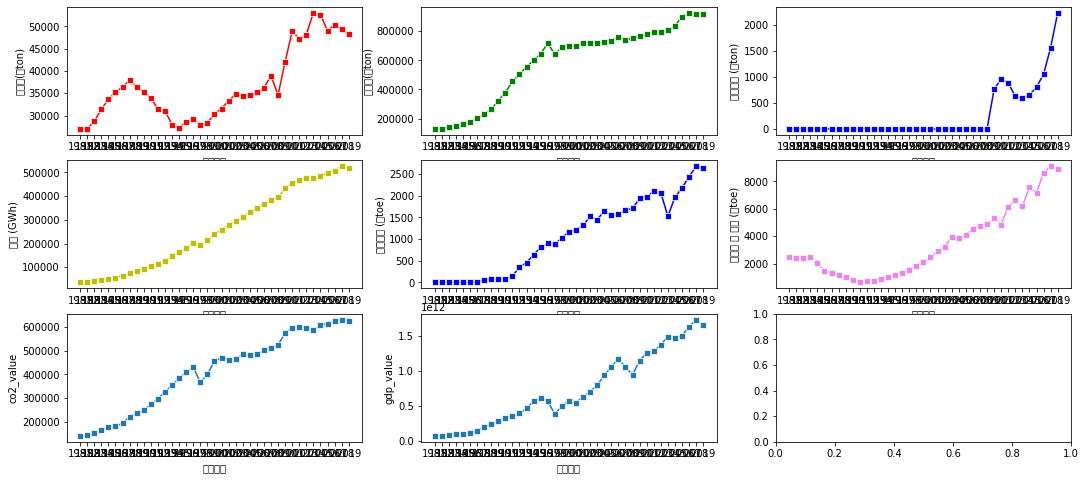

In [239]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6) , (ax7 , ax8 , ax9)) = plt.subplots(nrows=3, ncols=3)
figure.set_size_inches(18,8)
sns.lineplot(total_data.index, total_data['석탄합(천ton)'], marker='s', color='r' , ax = ax1)
sns.lineplot(total_data.index, total_data['석유합(천ton)'], marker='s', color='g' ,ax = ax2)
sns.lineplot(total_data.index, total_data['천연가스 (천ton)'], marker='s', color='b',ax = ax3)
sns.lineplot(total_data.index, total_data['전력 (GWh)'], marker='s', color='y',ax = ax4)
sns.lineplot(total_data.index, total_data['열에너지 (천toe)'], marker='s', color='b',ax = ax5)
sns.lineplot(total_data.index, total_data['신재생 및 기타 (천toe)'], marker='s', color='violet',ax = ax6)
sns.lineplot(total_data.index, total_data['co2_value'], marker='s',ax = ax7)
sns.lineplot(total_data.index, total_data['gdp_value'], marker='s',ax = ax8)
plt.show()

In [241]:
# 데이터 세트 분리
from sklearn.model_selection import train_test_split
x = total_data[['석탄합(천ton)', '석유합(천ton)', '천연가스 (천ton)', '전력 (GWh)',
       '열에너지 (천toe)', '신재생 및 기타 (천toe)', 'gdp_value']]
y = total_data[['co2_value']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [243]:
# 모델 생성
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [244]:
# x시험 데이터 x_test 를 넣어서 예측한 값이 y_predict로 저장 후에 y_test 와 비교
y_predict = mlr.predict(x_test)

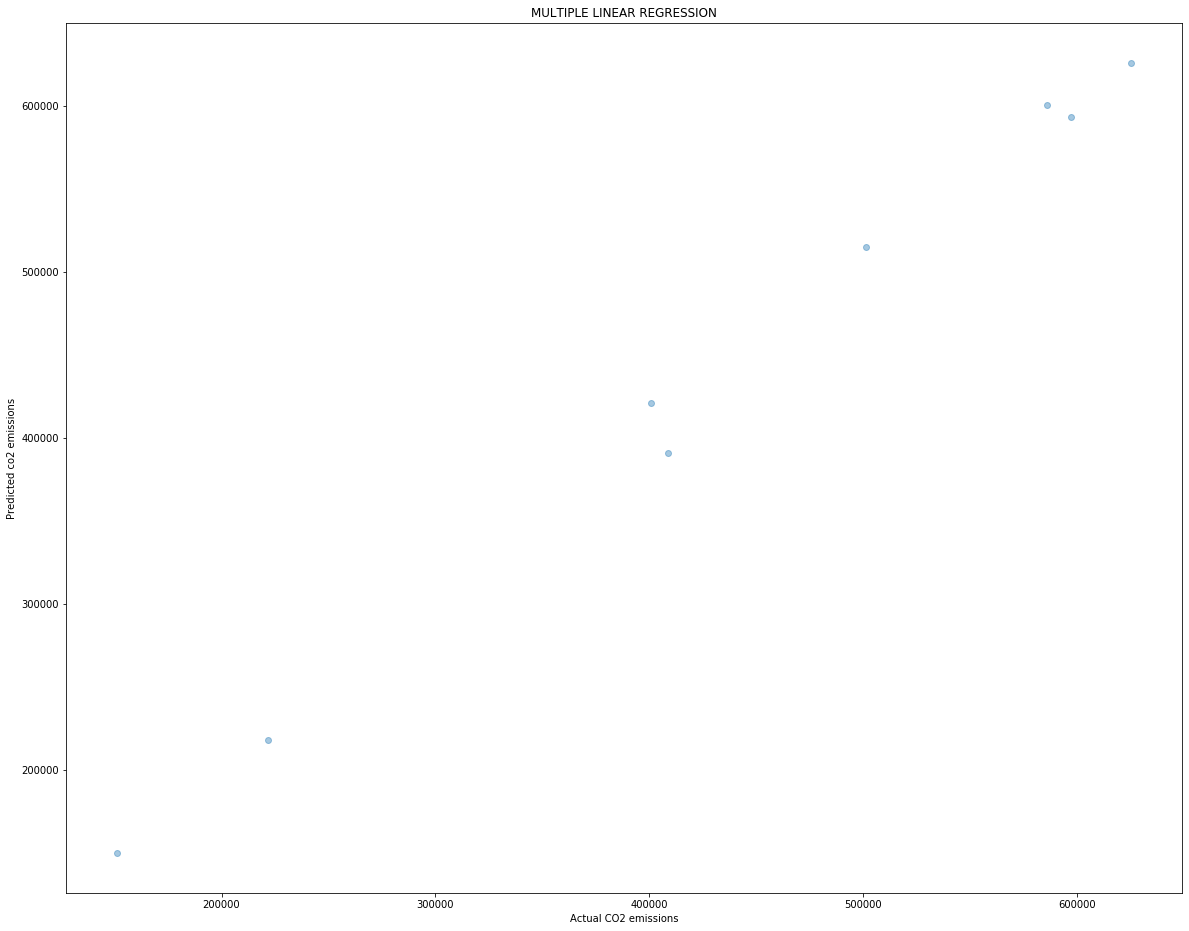

In [245]:
# 정답을 맞추는지 시각화
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual CO2 emissions")
plt.ylabel("Predicted co2 emissions")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [247]:
print(mlr.score(x_train, y_train))

0.9953372542520402


#### lstm 사용해보기

In [250]:
#정규화 data 를 0,1 사이의 값을 갖도록
from sklearn.preprocessing import MinMaxScaler

total_data.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['석탄합(천ton)', '석유합(천ton)', '천연가스 (천ton)', '전력 (GWh)',
       '열에너지 (천toe)', '신재생 및 기타 (천toe)', 'gdp_value','co2_value']
df_scaled = scaler.fit_transform(total_data[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,석탄합(천ton),석유합(천ton),천연가스 (천ton),전력 (GWh),열에너지 (천toe),신재생 및 기타 (천toe),gdp_value,co2_value
0,0.000000,0.002923,0.000000,0.000000,0.000000,0.220678,0.000000,0.000000
1,0.002761,0.000000,0.000000,0.005005,0.000000,0.211846,0.003284,0.004405
2,0.066636,0.014138,0.000000,0.014664,0.000000,0.207254,0.008976,0.022728
3,0.170271,0.029661,0.000000,0.023694,0.000000,0.220678,0.014878,0.049212
4,0.254773,0.038899,0.000000,0.031197,0.000000,0.166392,0.017170,0.078577
5,0.316694,0.062984,0.000000,0.042562,0.000000,0.101507,0.026577,0.086962
6,0.362242,0.091748,0.000000,0.058577,0.003729,0.082548,0.045411,0.107749
7,0.419830,0.129133,0.000000,0.079256,0.023490,0.064296,0.076673,0.167406
8,0.364351,0.169327,0.000000,0.095304,0.026473,0.048870,0.105328,0.195682
9,0.317959,0.244538,0.000000,0.120004,0.027964,0.021079,0.127388,0.222972


In [262]:
TEST_SIZE = 10
WINDOW_SIZE = 20

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]
display(train)
display(test)

,석탄합(천ton),석유합(천ton),천연가스 (천ton),전력 (GWh),열에너지 (천toe),신재생 및 기타 (천toe),gdp_value,co2_value
0,0.000000,0.002923,0.0,0.000000,0.000000,0.220678,0.000000,0.000000
1,0.002761,0.000000,0.0,0.005005,0.000000,0.211846,0.003284,0.004405
2,0.066636,0.014138,0.0,0.014664,0.000000,0.207254,0.008976,0.022728
3,0.170271,0.029661,0.0,0.023694,0.000000,0.220678,0.014878,0.049212
4,0.254773,0.038899,0.0,0.031197,0.000000,0.166392,0.017170,0.078577
5,0.316694,0.062984,0.0,0.042562,0.000000,0.101507,0.026577,0.086962
6,0.362242,0.091748,0.0,0.058577,0.003729,0.082548,0.045411,0.107749
7,0.419830,0.129133,0.0,0.079256,0.023490,0.064296,0.076673,0.167406
8,0.364351,0.169327,0.0,0.095304,0.026473,0.048870,0.105328,0.195682
9,0.317959,0.244538,0.0,0.120004,0.027964,0.021079,0.127388,0.222972


,석탄합(천ton),석유합(천ton),천연가스 (천ton),전력 (GWh),열에너지 (천toe),신재생 및 기타 (천toe),gdp_value,co2_value
29,0.577793,0.799596,0.341715,0.812551,0.722968,0.554404,0.648421,0.884735
30,0.840465,0.814526,0.432420,0.855155,0.736764,0.498351,0.714495,0.931627
31,0.777739,0.833726,0.397845,0.878637,0.783743,0.652143,0.729756,0.935027
32,0.812553,0.835312,0.279749,0.895461,0.771812,0.709020,0.785673,0.932339
33,1.000000,0.847950,0.264930,0.901050,0.569724,0.654381,0.854393,0.908639
34,0.982900,0.889467,0.293220,0.913406,0.733408,0.821597,0.843164,0.950400
35,0.845372,0.965759,0.359677,0.940680,0.813945,0.771903,0.863952,0.967239
36,0.896902,1.000000,0.471037,0.962498,0.910142,0.944418,0.938889,0.988761
37,0.855954,0.991753,0.700494,1.000000,1.000000,1.000000,1.000000,1.000000
38,0.814163,0.989792,1.000000,0.988486,0.986577,0.976448,0.952716,0.992191


In [305]:
def make_dataset(data, label, window_size=10):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [306]:
from sklearn.model_selection import train_test_split

feature_cols = ['석탄합(천ton)', '석유합(천ton)', '천연가스 (천ton)', '전력 (GWh)','열에너지 (천toe)', '신재생 및 기타 (천toe)', 'gdp_value']
label_cols = ['co2_value']

train_feature = train[feature_cols]
display(train_feature)
train_label = train[label_cols]
display(train_label)
train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

,석탄합(천ton),석유합(천ton),천연가스 (천ton),전력 (GWh),열에너지 (천toe),신재생 및 기타 (천toe),gdp_value
0,0.000000,0.002923,0.0,0.000000,0.000000,0.220678,0.000000
1,0.002761,0.000000,0.0,0.005005,0.000000,0.211846,0.003284
2,0.066636,0.014138,0.0,0.014664,0.000000,0.207254,0.008976
3,0.170271,0.029661,0.0,0.023694,0.000000,0.220678,0.014878
4,0.254773,0.038899,0.0,0.031197,0.000000,0.166392,0.017170
5,0.316694,0.062984,0.0,0.042562,0.000000,0.101507,0.026577
6,0.362242,0.091748,0.0,0.058577,0.003729,0.082548,0.045411
7,0.419830,0.129133,0.0,0.079256,0.023490,0.064296,0.076673
8,0.364351,0.169327,0.0,0.095304,0.026473,0.048870,0.105328
9,0.317959,0.244538,0.0,0.120004,0.027964,0.021079,0.127388


,co2_value
0,0.000000
1,0.004405
2,0.022728
3,0.049212
4,0.078577
5,0.086962
6,0.107749
7,0.167406
8,0.195682
9,0.222972


((7, 20, 7), (2, 20, 7))

In [307]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((10, 7), (10, 1))

In [308]:
test_feature, test_label = make_dataset(test_feature, test_label, 3)
test_feature.shape, test_label.shape

((7, 3, 7), (7, 1))

In [309]:
#모형 생성
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM

#tf.keras.models.load_model(model_path)


model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

In [310]:
# 모형 학습
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
1/1 [==============================] - ETA: 0s - loss: 0.4410
Epoch 00001: val_loss improved from inf to 0.41230, saving model to model\tmp_checkpoint.h5
1/1 [==============================] - 0s 114ms/step - loss: 0.4410 - val_loss: 0.4123
Epoch 2/200
1/1 [==============================] - ETA: 0s - loss: 0.4218
Epoch 00002: val_loss improved from 0.41230 to 0.39355, saving model to model\tmp_checkpoint.h5
1/1 [==============================] - 0s 31ms/step - loss: 0.4218 - val_loss: 0.3936
Epoch 3/200
1/1 [==============================] - ETA: 0s - loss: 0.4031
Epoch 00003: val_loss improved from 0.39355 to 0.37524, saving model to model\tmp_checkpoint.h5
1/1 [==============================] - 0s 33ms/step - loss: 0.4031 - val_loss: 0.3752
Epoch 4/200
1/1 [==============================] - ETA: 0s - loss: 0.3847
Epoch 00004: val_loss improved from 0.37524 to 0.35733, saving model to model\tmp_checkpoint.h5
1/1 [==============================] - 0s 29ms/step - loss: 0.384

Epoch 33/200
1/1 [==============================] - ETA: 0s - loss: 0.0253
Epoch 00033: val_loss improved from 0.02644 to 0.02388, saving model to model\tmp_checkpoint.h5
1/1 [==============================] - 0s 30ms/step - loss: 0.0253 - val_loss: 0.0239
Epoch 34/200
1/1 [==============================] - ETA: 0s - loss: 0.0215
Epoch 00034: val_loss improved from 0.02388 to 0.02277, saving model to model\tmp_checkpoint.h5
1/1 [==============================] - 0s 33ms/step - loss: 0.0215 - val_loss: 0.0228
Epoch 35/200
1/1 [==============================] - ETA: 0s - loss: 0.0190
Epoch 00035: val_loss did not improve from 0.02277
1/1 [==============================] - 0s 20ms/step - loss: 0.0190 - val_loss: 0.0231
Epoch 36/200
1/1 [==============================] - ETA: 0s - loss: 0.0179
Epoch 00036: val_loss did not improve from 0.02277
1/1 [==============================] - 0s 19ms/step - loss: 0.0179 - val_loss: 0.0246
Epoch 37/200
1/1 [==============================] - ETA: 0s - 

In [311]:
display(test_feature)
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

array([[[0.57779311, 0.79959635, 0.34171531, 0.81255082, 0.72296793,
         0.55440415, 0.64842052],
        [0.84046469, 0.81452631, 0.4324203 , 0.85515513, 0.73676361,
         0.49835139, 0.71449528],
        [0.77773944, 0.83372591, 0.39784463, 0.87863671, 0.78374348,
         0.65214319, 0.72975634]],

       [[0.84046469, 0.81452631, 0.4324203 , 0.85515513, 0.73676361,
         0.49835139, 0.71449528],
        [0.77773944, 0.83372591, 0.39784463, 0.87863671, 0.78374348,
         0.65214319, 0.72975634],
        [0.81255272, 0.83531167, 0.27974854, 0.8954608 , 0.77181208,
         0.70902025, 0.78567321]],

       [[0.77773944, 0.83372591, 0.39784463, 0.87863671, 0.78374348,
         0.65214319, 0.72975634],
        [0.81255272, 0.83531167, 0.27974854, 0.8954608 , 0.77181208,
         0.70902025, 0.78567321],
        [1.        , 0.84795011, 0.2649304 , 0.90105049, 0.56972409,
         0.65438059, 0.85439338]],

       [[0.81255272, 0.83531167, 0.27974854, 0.8954608 , 0.77181208

(7, 1)

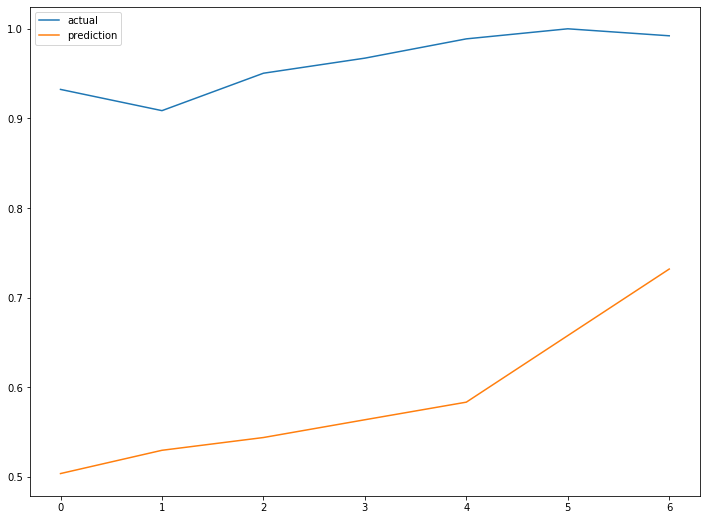

In [312]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

#### 2번쨰 다변인 선형회귀 모델

In [603]:
total_data_ = total_data[['석탄합(천ton)', '석유합(천ton)', '천연가스 (천ton)', '전력 (GWh)','열에너지 (천toe)', '신재생 및 기타 (천toe)', 'gdp_value','co2_value']]
display(total_data_)
xy = np.array(total_data_ , dtype = np.float32)
xy

,석탄합(천ton),석유합(천ton),천연가스 (천ton),전력 (GWh),열에너지 (천toe),신재생 및 기타 (천toe),gdp_value,co2_value
대상연도,,,,,,,,
1981,26970.0,131230.0,0.0,35424.0,0.0,2492.0,7.293335e+10,139742.036
1982,27042.0,128898.0,0.0,37880.0,0.0,2417.0,7.835887e+10,141905.566
1983,28708.0,140176.0,0.0,42620.0,0.0,2378.0,8.776036e+10,150904.384
1984,31411.0,152559.0,0.0,47051.0,0.0,2492.0,9.751024e+10,163911.233
1985,33615.0,159929.0,0.0,50733.0,0.0,2031.0,1.012960e+11,178333.544
1986,35230.0,179142.0,0.0,56310.0,0.0,1480.0,1.168370e+11,182451.585
1987,36418.0,202088.0,0.0,64169.0,10.0,1319.0,1.479480e+11,192660.513
1988,37920.0,231911.0,0.0,74317.0,63.0,1164.0,1.995910e+11,221959.843
1989,36473.0,263974.0,0.0,82192.0,71.0,1033.0,2.469270e+11,235846.772


array([[2.6970000e+04, 1.3123000e+05, 0.0000000e+00, 3.5424000e+04,
        0.0000000e+00, 2.4920000e+03, 7.2933351e+10, 1.3974203e+05],
       [2.7042000e+04, 1.2889800e+05, 0.0000000e+00, 3.7880000e+04,
        0.0000000e+00, 2.4170000e+03, 7.8358864e+10, 1.4190556e+05],
       [2.8708000e+04, 1.4017600e+05, 0.0000000e+00, 4.2620000e+04,
        0.0000000e+00, 2.3780000e+03, 8.7760364e+10, 1.5090439e+05],
       [3.1411000e+04, 1.5255900e+05, 0.0000000e+00, 4.7051000e+04,
        0.0000000e+00, 2.4920000e+03, 9.7510236e+10, 1.6391123e+05],
       [3.3615000e+04, 1.5992900e+05, 0.0000000e+00, 5.0733000e+04,
        0.0000000e+00, 2.0310000e+03, 1.0129600e+11, 1.7833355e+05],
       [3.5230000e+04, 1.7914200e+05, 0.0000000e+00, 5.6310000e+04,
        0.0000000e+00, 1.4800000e+03, 1.1683700e+11, 1.8245158e+05],
       [3.6418000e+04, 2.0208800e+05, 0.0000000e+00, 6.4169000e+04,
        1.0000000e+01, 1.3190000e+03, 1.4794800e+11, 1.9266052e+05],
       [3.7920000e+04, 2.3191100e+05, 0.0

In [604]:
x_data = xy[:,0:-1]
display(len(x_data[0]))
y_data = xy[:,[-1]]
display(len(y_data[1]))

7

1

In [605]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

X = tf.placeholder(tf.float32 , shape = [None,7])
#X = tf.placeholder(shape=[None, 7], dtype=tf.float32)
Y = tf.placeholder(tf.float32 , shape = [None,1])
W = tf.Variable(tf.random_normal([7,1]) , name = "weight" )
b = tf.Variable(tf.random_normal([1]) , name = "blas" )

In [606]:
hypothesis = tf.matmul(X,W) + b # y = ax + b, y = ax1 + bx2 +cx3 +b...

In [607]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [795]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate =  0.0000000000000000000000008)
train = optimizer.minimize(cost)

In [796]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [798]:
for step in range(100001):
    cost_ , hypo_ , _ = sess.run([cost, hypothesis, train] , feed_dict = {X: x_data , Y:y_data})
    if step%500 ==0:
        print('#' , step , '손실비용 ' , cost_)
        print('-배출량: ' , hypo_[0])
        

# 0 손실비용  10709027000.0
-배출량:  [69175.24]
# 500 손실비용  10709027000.0
-배출량:  [69175.24]
# 1000 손실비용  10709027000.0
-배출량:  [69175.24]
# 1500 손실비용  10709027000.0
-배출량:  [69175.24]
# 2000 손실비용  10709027000.0
-배출량:  [69175.24]
# 2500 손실비용  10709027000.0
-배출량:  [69175.24]
# 3000 손실비용  10709027000.0
-배출량:  [69175.24]
# 3500 손실비용  10709027000.0
-배출량:  [69175.24]
# 4000 손실비용  10709027000.0
-배출량:  [69175.24]
# 4500 손실비용  10709027000.0
-배출량:  [69175.24]
# 5000 손실비용  10709027000.0
-배출량:  [69175.24]
# 5500 손실비용  10709027000.0
-배출량:  [69175.24]
# 6000 손실비용  10709027000.0
-배출량:  [69175.24]
# 6500 손실비용  10709027000.0
-배출량:  [69175.24]
# 7000 손실비용  10709027000.0
-배출량:  [69175.24]
# 7500 손실비용  10709027000.0
-배출량:  [69175.24]
# 8000 손실비용  10709027000.0
-배출량:  [69175.24]
# 8500 손실비용  10709027000.0
-배출량:  [69175.24]
# 9000 손실비용  10709027000.0
-배출량:  [69175.24]
# 9500 손실비용  10709027000.0
-배출량:  [69175.24]
# 10000 손실비용  10709027000.0
-배출량:  [69175.24]
# 10500 손실비용  10709027000.0
-배출량:  [69175.24]
# 11000 손실비용

# 90000 손실비용  10709027000.0
-배출량:  [69175.24]
# 90500 손실비용  10709027000.0
-배출량:  [69175.24]
# 91000 손실비용  10709027000.0
-배출량:  [69175.24]
# 91500 손실비용  10709027000.0
-배출량:  [69175.24]
# 92000 손실비용  10709027000.0
-배출량:  [69175.24]
# 92500 손실비용  10709027000.0
-배출량:  [69175.24]
# 93000 손실비용  10709027000.0
-배출량:  [69175.24]
# 93500 손실비용  10709027000.0
-배출량:  [69175.24]
# 94000 손실비용  10709027000.0
-배출량:  [69175.24]
# 94500 손실비용  10709027000.0
-배출량:  [69175.24]
# 95000 손실비용  10709027000.0
-배출량:  [69175.24]
# 95500 손실비용  10709027000.0
-배출량:  [69175.24]
# 96000 손실비용  10709027000.0
-배출량:  [69175.24]
# 96500 손실비용  10709027000.0
-배출량:  [69175.24]
# 97000 손실비용  10709027000.0
-배출량:  [69175.24]
# 97500 손실비용  10709027000.0
-배출량:  [69175.24]
# 98000 손실비용  10709027000.0
-배출량:  [69175.24]
# 98500 손실비용  10709027000.0
-배출량:  [69175.24]
# 99000 손실비용  10709027000.0
-배출량:  [69175.24]
# 99500 손실비용  10709027000.0
-배출량:  [69175.24]
# 100000 손실비용  10709027000.0
-배출량:  [69175.24]


In [362]:
saver = tf.train.Saver()
save_path = saver.save(sess , './saved.cpkt')
print('학습된 모델 저장')

학습된 모델 저장


## 탄소배출권 시세

In [313]:
# cer_data 안에 모든 csv 파일 경로 list 형식
file_path = glob('cer_data/탄소배출권시세*.csv')
print(file_path)
all_file = []
for path in file_path:
    csvfile = pd.read_csv(path  , index_col=False)
    all_file.append(csvfile)
# csv파일들 전부 합침
all_data = pd.concat(all_file, ignore_index=True)
all_data

['cer_data\\탄소배출권시세20150112_20151014.csv', 'cer_data\\탄소배출권시세20151015_20161014.csv', 'cer_data\\탄소배출권시세20161015_20171014.csv', 'cer_data\\탄소배출권시세20171015_20181014.csv', 'cer_data\\탄소배출권시세20181015_20191014.csv', 'cer_data\\탄소배출권시세20191015_20201014.csv', 'cer_data\\탄소배출권시세20201015_20211015.csv']


,일자,종목명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
0,2015-10-14,KAU15,"11,300",0,0.00,0,0,0,0,0,0
1,2015-10-14,KAU16,"7,880",0,0.00,0,0,0,0,0,0
2,2015-10-14,KAU17,"7,880",0,0.00,0,0,0,0,0,0
3,2015-10-14,KCU15,"10,550",0,0.00,0,0,0,0,0,0
4,2015-10-13,KAU15,"11,300",0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8315,2020-10-16,KOC,"33,000",0,0.00,0,0,0,0,0,0
8316,2020-10-16,i-KOC,"37,600",0,0.00,0,0,0,0,0,0
8317,2020-10-15,KAU20,"23,550",-150,-0.63,"23,000","23,800","23,000","35,500","825,375,000","23,250"
8318,2020-10-15,KOC,"33,000",0,0.00,0,0,0,0,0,0


In [314]:
all_data["일자"] = pd.to_datetime(all_data["일자"], format='%Y-%m-%d')
KAU_data = all_data[all_data['종목명'].str.contains('KAU')]
KAU_data = KAU_data.reset_index()

KAU_data['종가'] = KAU_data['종가'].str.replace(',' , '' ).astype(float)
KAU_data = KAU_data.drop('index' ,axis = 1)
KAU_data

,일자,종목명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
0,2015-10-14,KAU15,11300.0,0,0.00,0,0,0,0,0,0
1,2015-10-14,KAU16,7880.0,0,0.00,0,0,0,0,0,0
2,2015-10-14,KAU17,7880.0,0,0.00,0,0,0,0,0,0
3,2015-10-13,KAU15,11300.0,0,0.00,0,0,0,0,0,0
4,2015-10-13,KAU16,7880.0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4386,2020-10-21,KAU20,25000.0,0,0.00,"25,000","25,100","25,000","14,500","362,800,000","25,021"
4387,2020-10-20,KAU20,25000.0,500,2.04,"24,500","25,000","24,500","19,000","470,600,000","24,768"
4388,2020-10-19,KAU20,24500.0,400,1.66,"24,500","24,500","24,100","93,500","2,262,625,000","24,199"
4389,2020-10-16,KAU20,24100.0,550,2.34,"24,000","24,300","24,000","55,000","1,322,400,000","24,044"


In [317]:
KAU_data_grp = KAU_data.set_index(['종목명' , '일자']).groupby(level = [0,1])
display(KAU_data_grp.mean())

# KAU 년도별 종가 시가 등등 정렬
KAU_data_srt = KAU_data.set_index(['종목명' , '일자']).sort_values(by = ['종목명' , '일자']) 
KAU_data_srt = KAU_data_srt.reset_index()
KAU_data_srt

# 1차2015 - 2017
KAU_data_srt_15 = KAU_data_srt[KAU_data_srt['종목명'] == 'KAU15']
display(KAU_data_srt_15) # 20150112 - 20160630
KAU_data_srt_16 = KAU_data_srt[KAU_data_srt['종목명'] == 'KAU16']
display(KAU_data_srt_16) # 20150112 - 20170630
KAU_data_srt_17 = KAU_data_srt[KAU_data_srt['종목명'] == 'KAU17']
display(KAU_data_srt_17) # 20150112 - 20180809
# 2차 2018 - 2020
KAU_data_srt_18 = KAU_data_srt[KAU_data_srt['종목명'] == 'KAU18']
display(KAU_data_srt_18) # 20180102 - 20190930
KAU_data_srt_19 = KAU_data_srt[KAU_data_srt['종목명'] == 'KAU19']
display(KAU_data_srt_19) # 20181108 - 20200911
KAU_data_srt_20 = KAU_data_srt[KAU_data_srt['종목명'] == 'KAU20']
display(KAU_data_srt_20) # 20181108 - 20210810
# 3차 2021 - 2025
KAU_data_srt_21 = KAU_data_srt[KAU_data_srt['종목명'] == 'KAU21']
display(KAU_data_srt_21) # 20210104 - 20211015

종가   대비   등락률
종목명   일자                            
KAU15 2015-01-12   8640.0  780  9.92
      2015-01-13   9500.0  860  9.95
      2015-01-14   9510.0   10  0.11
      2015-01-15   9580.0   70  0.74
      2015-01-16   9610.0   30  0.31
...                   ...  ...   ...
KAU25 2021-10-08  29400.0    0  0.00
      2021-10-12  29400.0    0  0.00
      2021-10-13  29400.0    0  0.00
      2021-10-14  29400.0    0  0.00
      2021-10-15  29400.0    0  0.00

[4391 rows x 3 columns]

,종목명,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
0,KAU15,2015-01-12,8640.0,780,9.92,"7,860","8,640","7,860","1,190","9,740,400","8,185"
1,KAU15,2015-01-13,9500.0,860,9.95,"9,500","9,500","9,500",50,"475,000","9,500"
2,KAU15,2015-01-14,9510.0,10,0.11,"9,510","9,510","9,510",100,"951,000","9,510"
3,KAU15,2015-01-15,9580.0,70,0.74,0,0,0,0,0,0
4,KAU15,2015-01-16,9610.0,30,0.31,"9,610","9,610","9,610",40,"384,400","9,610"
...,...,...,...,...,...,...,...,...,...,...,...
358,KAU15,2016-06-24,17000.0,0,0.00,0,0,0,0,0,0
359,KAU15,2016-06-27,17000.0,0,0.00,0,0,0,0,0,0
360,KAU15,2016-06-28,17000.0,0,0.00,0,0,0,0,0,0
361,KAU15,2016-06-29,17000.0,0,0.00,0,0,0,0,0,0


,종목명,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
363,KAU16,2015-01-12,7860.0,7860,0.00,0,0,0,0,0,0
364,KAU16,2015-01-13,7860.0,0,0.00,0,0,0,0,0,0
365,KAU16,2015-01-14,7860.0,0,0.00,0,0,0,0,0,0
366,KAU16,2015-01-15,7860.0,0,0.00,0,0,0,0,0,0
367,KAU16,2015-01-16,7860.0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
968,KAU16,2017-06-26,21000.0,800,3.96,"21,000","21,000","21,000","45,358","918,626,000","20,253"
969,KAU16,2017-06-27,21000.0,0,0.00,0,0,0,"14,501","293,645,250","20,250"
970,KAU16,2017-06-28,21000.0,0,0.00,"21,000","21,000","21,000","33,231","697,851,000","21,000"
971,KAU16,2017-06-29,21500.0,500,2.38,"21,000","21,500","21,000","11,061","232,811,500","21,048"


,종목명,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
973,KAU17,2015-01-12,7860.0,7860,0.00,0,0,0,0,0,0
974,KAU17,2015-01-13,7860.0,0,0.00,0,0,0,0,0,0
975,KAU17,2015-01-14,7860.0,0,0.00,0,0,0,0,0,0
976,KAU17,2015-01-15,7860.0,0,0.00,0,0,0,0,0,0
977,KAU17,2015-01-16,7860.0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1849,KAU17,2018-08-03,21700.0,0,0.00,"21,700","21,700","21,700","20,533","445,566,100","21,700"
1850,KAU17,2018-08-06,21700.0,0,0.00,"22,600","22,600","21,700","17,981","392,269,800","21,816"
1851,KAU17,2018-08-07,21600.0,-100,-0.46,"21,500","21,700","21,500","61,445","1,329,328,700","21,634"
1852,KAU17,2018-08-08,21600.0,0,0.00,0,0,0,"4,839","104,522,400","21,600"


,종목명,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
1854,KAU18,2018-01-02,20000.0,0,0.00,0,0,0,0,0,0
1855,KAU18,2018-01-03,20000.0,0,0.00,0,0,0,0,0,0
1856,KAU18,2018-01-04,20000.0,0,0.00,0,0,0,0,0,0
1857,KAU18,2018-01-05,20000.0,0,0.00,0,0,0,0,0,0
1858,KAU18,2018-01-08,20000.0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2277,KAU18,2019-09-24,35600.0,700,2.01,"35,100","35,600","35,100","8,639","304,636,100","35,263"
2278,KAU18,2019-09-25,37000.0,1400,3.93,"36,000","37,000","36,000","16,058","582,101,900","36,250"
2279,KAU18,2019-09-26,38000.0,1000,2.70,"38,000","38,000","38,000","2,528","96,064,000","38,000"
2280,KAU18,2019-09-27,39000.0,1000,2.63,"39,000","39,000","39,000",271,"10,569,000","39,000"


,종목명,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
2282,KAU19,2018-11-08,23200.0,0,0.00,0,0,0,0,0,0
2283,KAU19,2018-11-09,23200.0,0,0.00,0,0,0,0,0,0
2284,KAU19,2018-11-12,23200.0,0,0.00,0,0,0,0,0,0
2285,KAU19,2018-11-13,23200.0,0,0.00,0,0,0,0,0,0
2286,KAU19,2018-11-14,23200.0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2734,KAU19,2020-09-07,21000.0,0,0.00,0,0,0,"100,680","2,114,280,000","21,000"
2735,KAU19,2020-09-08,21250.0,250,1.19,0,0,0,0,0,0
2736,KAU19,2020-09-09,21250.0,0,0.00,"20,000","21,500","20,000","15,604","320,217,800","20,522"
2737,KAU19,2020-09-10,20850.0,-400,-1.88,"21,000","21,000","20,850","1,424","29,900,550","20,998"


,종목명,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
2739,KAU20,2018-11-08,23200.0,0,0.00,0,0,0,0,0,0
2740,KAU20,2018-11-09,23200.0,0,0.00,0,0,0,0,0,0
2741,KAU20,2018-11-12,23200.0,0,0.00,0,0,0,0,0,0
2742,KAU20,2018-11-13,23200.0,0,0.00,0,0,0,0,0,0
2743,KAU20,2018-11-14,23200.0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3416,KAU20,2021-08-04,22100.0,-400,-1.78,"23,000","23,450","22,100","32,311","749,349,400","23,192"
3417,KAU20,2021-08-05,22400.0,300,1.36,"23,300","24,000","22,400","52,577","1,233,108,000","23,453"
3418,KAU20,2021-08-06,22500.0,100,0.45,"22,800","22,800","22,400","37,589","844,023,500","22,454"
3419,KAU20,2021-08-09,22500.0,0,0.00,"20,500","22,500","20,500","226,969","5,014,088,000","22,092"


,종목명,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
3421,KAU21,2021-01-04,23000.0,0,0.00,0,0,0,0,0,0
3422,KAU21,2021-01-05,23000.0,0,0.00,0,0,0,0,0,0
3423,KAU21,2021-01-06,23000.0,0,0.00,0,0,0,0,0,0
3424,KAU21,2021-01-07,23000.0,0,0.00,0,0,0,0,0,0
3425,KAU21,2021-01-08,23000.0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3610,KAU21,2021-10-08,30100.0,500,1.69,"29,600","30,200","29,600","10,272","307,607,600","29,946"
3611,KAU21,2021-10-12,30100.0,0,0.00,"30,100","30,400","30,100","13,500","407,170,000","30,161"
3612,KAU21,2021-10-13,29600.0,-500,-1.66,"30,100","30,100","29,500","10,590","316,674,000","29,903"
3613,KAU21,2021-10-14,30100.0,500,1.69,"29,650","30,200","29,650","13,000","389,325,000","29,948"


In [327]:
KAU_data_srt_16 = KAU_data_srt_16[KAU_data_srt_16['일자'] >= '2016-06-13']
KAU_data_srt_17 = KAU_data_srt_17[KAU_data_srt_17['일자'] > '2017-06-30']
KAU_data_srt_18 = KAU_data_srt_18[KAU_data_srt_18['일자'] > '2018-08-09']
KAU_data_srt_19 = KAU_data_srt_19[KAU_data_srt_19['일자'] > '2019-09-30']
KAU_data_srt_20 = KAU_data_srt_20[KAU_data_srt_20['일자'] > '2020-09-11']
KAU_data_srt_21 = KAU_data_srt_21[KAU_data_srt_21['일자'] > '2021-08-10']


In [328]:
all_KAU = [KAU_data_srt_16,KAU_data_srt_17, KAU_data_srt_18 ,KAU_data_srt_19 , KAU_data_srt_20 , KAU_data_srt_21]
all_KAU_data = pd.concat(all_KAU, ignore_index=True)
all_KAU_data

,종목명,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,가중평균
0,KAU16,2016-06-13,16600.0,0,0.00,0,0,0,0,0,0
1,KAU16,2016-06-14,16600.0,0,0.00,0,0,0,0,0,0
2,KAU16,2016-06-15,16600.0,0,0.00,0,0,0,0,0,0
3,KAU16,2016-06-16,16600.0,0,0.00,0,0,0,0,0,0
4,KAU16,2016-06-17,16600.0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1309,KAU21,2021-10-08,30100.0,500,1.69,"29,600","30,200","29,600","10,272","307,607,600","29,946"
1310,KAU21,2021-10-12,30100.0,0,0.00,"30,100","30,400","30,100","13,500","407,170,000","30,161"
1311,KAU21,2021-10-13,29600.0,-500,-1.66,"30,100","30,100","29,500","10,590","316,674,000","29,903"
1312,KAU21,2021-10-14,30100.0,500,1.69,"29,650","30,200","29,650","13,000","389,325,000","29,948"


C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ksy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  f

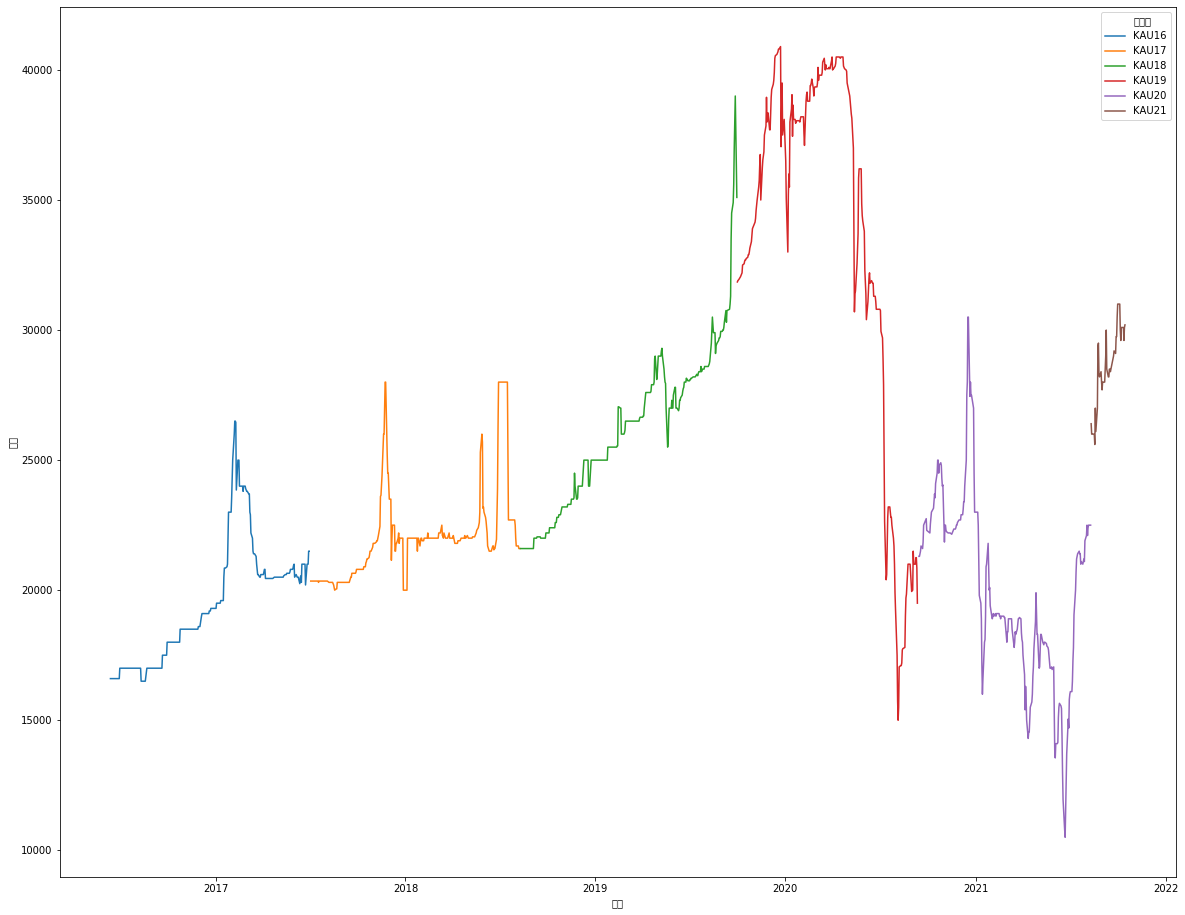

In [329]:
sns.lineplot(x='일자', 
             y='종가', 
             hue='종목명',
             data=all_KAU_data)
plt.show()

In [390]:
#전력수요 예측데이터
file_path = glob('cer_data/el/bid*.csv')
display(file_path)
csvfile = pd.read_csv(file_path[0]  ,sep = ',', index_col=False , encoding ='cp949')
el_data = csvfile[['구분' , '총 전력수요'] ]
el_data

['cer_data/el\\bidforecastgen_land.csv']

,구분,총 전력수요
0,20160101,1191840
1,20160102,1218450
2,20160103,1219330
3,20160104,1502150
4,20160105,1540870
...,...,...
2120,20211021,1445700
2121,20211022,1420670
2122,20211023,1234830
2123,20211024,1190060


In [379]:
#kospi 지수
# cer_data 안에 모든 csv 파일 경로 list 형식
file_path = glob('cer_data/kospi/*.csv')
print(file_path)
all_file = []
for path in file_path:
    csvfile = pd.read_csv(path ,encoding = 'cp949' , index_col=False)
    all_file.append(csvfile)
# csv파일들 전부 합침
all_data = pd.concat(all_file, ignore_index=True)
kospi_data = all_data[['일자' , '종가']]
kospi_data

['cer_data/kospi\\kospi_20160104_20170102_data_4911_20211024.csv', 'cer_data/kospi\\kospi_20170103_20180102_data_5026_20211024.csv', 'cer_data/kospi\\kospi_20180103_20190102_data_5122_20211024.csv', 'cer_data/kospi\\kospi_20190103_20200102_data_5211_20211024.csv', 'cer_data/kospi\\kospi_20200104_20211022_data_5322_20211024.csv']


,일자,종가
0,2017/01/02,2026.16
1,2016/12/29,2026.46
2,2016/12/28,2024.49
3,2016/12/27,2042.17
4,2016/12/26,2037.75
...,...,...
1421,2020/01/09,2186.45
1422,2020/01/08,2151.31
1423,2020/01/07,2175.54
1424,2020/01/06,2155.07


In [387]:
#원유
file_path = glob('cer_data/원유/*.csv')
print(file_path)
all_file = []
for path in file_path:
    csvfile = pd.read_csv(path ,encoding = 'cp949' , index_col=False)
    all_file.append(csvfile)
# csv파일들 전부 합침
all_data = pd.concat(all_file, ignore_index=True)
oil_data = all_data[['기준일' , '기준가격']]
oil_data

['cer_data/원유\\원유+가격 20160101_2021-10-25.csv']


,기준일,기준가격
0,2016-01-08,33.16
1,2016-01-15,29.42
2,2016-01-22,32.19
3,2016-01-29,33.62
4,2016-02-05,30.89
...,...,...
293,2021-09-24,73.98
294,2021-10-01,75.88
295,2021-10-08,79.35
296,2021-10-15,82.28


In [389]:
#원유
file_path = glob('cer_data/석탄/*.csv')
print(file_path)
all_file = []
for path in file_path:
    csvfile = pd.read_csv(path ,encoding = 'cp949' , index_col=False)
    all_file.append(csvfile)
# csv파일들 전부 합침
all_data = pd.concat(all_file, ignore_index=True)
coal_data = all_data[['기준일' , '기준가격']]
coal_data

['cer_data/석탄\\유연탄+가격 20160101_2021-10-25 (1).csv']


,기준일,기준가격
0,2016-01-08,46.76
1,2016-01-15,46.50
2,2016-01-22,46.40
3,2016-01-29,45.65
4,2016-02-05,44.70
...,...,...
298,2021-09-24,141.68
299,2021-10-01,151.05
300,2021-10-08,167.55
301,2021-10-15,203.01


In [396]:
#원유 , 석탄 , kospi , 전력 , 배출권시세
display(coal_data) # 기준일 기준가격
display(oil_data) # 기준일 기준가격
kospi_data.rename(columns = {'일자' : '기준일' ,'종가' : '기준가격' } , inplace = True)
display(kospi_data) #
el_data.rename(columns = {'구분' : '기준일' ,'총 전력수요' : '기준가격' } , inplace = True)
display(el_data)
KAU_data = all_KAU_data[['일자' , '종가']]
KAU_data.rename(columns = {'일자' : '기준일' ,'종가' : '기준가격' } , inplace = True)
display(KAU_data)

,기준일,기준가격
0,2016-01-08,46.76
1,2016-01-15,46.50
2,2016-01-22,46.40
3,2016-01-29,45.65
4,2016-02-05,44.70
...,...,...
298,2021-09-24,141.68
299,2021-10-01,151.05
300,2021-10-08,167.55
301,2021-10-15,203.01


,기준일,기준가격
0,2016-01-08,33.16
1,2016-01-15,29.42
2,2016-01-22,32.19
3,2016-01-29,33.62
4,2016-02-05,30.89
...,...,...
293,2021-09-24,73.98
294,2021-10-01,75.88
295,2021-10-08,79.35
296,2021-10-15,82.28


,기준일,기준가격
0,2017/01/02,2026.16
1,2016/12/29,2026.46
2,2016/12/28,2024.49
3,2016/12/27,2042.17
4,2016/12/26,2037.75
...,...,...
1421,2020/01/09,2186.45
1422,2020/01/08,2151.31
1423,2020/01/07,2175.54
1424,2020/01/06,2155.07


C:\Users\ksy\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,기준일,기준가격
0,20160101,1191840
1,20160102,1218450
2,20160103,1219330
3,20160104,1502150
4,20160105,1540870
...,...,...
2120,20211021,1445700
2121,20211022,1420670
2122,20211023,1234830
2123,20211024,1190060


C:\Users\ksy\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,기준일,기준가격
0,2016-06-13,16600.0
1,2016-06-14,16600.0
2,2016-06-15,16600.0
3,2016-06-16,16600.0
4,2016-06-17,16600.0
...,...,...
1309,2021-10-08,30100.0
1310,2021-10-12,30100.0
1311,2021-10-13,29600.0
1312,2021-10-14,30100.0


In [830]:
#KAU_data['기준일'] = pd.to_datetime(KAU_data['기준일'], format='%Y')
coal_data['기준일'] = coal_data['기준일'].astype(object).str.replace('-' , '' )
KAU_data['기준일'] = KAU_data['기준일'].astype(object).astype(str).str.replace('-' , '' )
oil_data['기준일'] = oil_data['기준일'].astype(object).str.replace('-' , '' )
kospi_data['기준일'] = kospi_data['기준일'].astype(object).str.replace('/' , '' )
el_data['기준일'] = el_data['기준일'].astype(object).astype(str).str.replace('' , '' )


total_data_2 = pd.merge(left = KAU_data , right = coal_data, how = "left", on = "기준일")
total_data_2 = pd.merge(left = total_data_2 , right = oil_data, how = "left", on = "기준일")
total_data_2 = pd.merge(left = total_data_2 , right = kospi_data, how = "left", on = "기준일")
total_data_2 = pd.merge(left = total_data_2 , right = el_data, how = "left", on = "기준일")

total_data_2 = total_data_2.fillna(method = 'bfill')
display(total_data_2)
total_data_2.columns = ['기준일','배출권가격','석탄가격','원유가격','코스피','전력수요']

C:\Users\ksy\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ksy\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ksy\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,기준일,기준가격_x,기준가격_y,기준가격_x,기준가격_y,기준가격
0,20160613,16600.0,47.48,47.98,1979.06,2631220
1,20160614,16600.0,47.48,47.98,1972.03,2686190
2,20160615,16600.0,47.48,47.98,1968.83,2688400
3,20160616,16600.0,47.48,47.98,1951.99,2611480
4,20160617,16600.0,47.48,47.98,1953.40,2461800
...,...,...,...,...,...,...
1309,20211008,30100.0,167.55,79.35,2956.30,1482500
1310,20211012,30100.0,203.01,82.28,2916.38,1428670
1311,20211013,29600.0,203.01,82.28,2944.41,1440320
1312,20211014,30100.0,203.01,82.28,2988.64,1450300


In [831]:
display(total_data_2)
total_data_2.columns = ['기준일','배출권가격','석탄가격','원유가격','코스피','전력수요']
total_data_2

,기준일,배출권가격,석탄가격,원유가격,코스피,전력수요
0,20160613,16600.0,47.48,47.98,1979.06,2631220
1,20160614,16600.0,47.48,47.98,1972.03,2686190
2,20160615,16600.0,47.48,47.98,1968.83,2688400
3,20160616,16600.0,47.48,47.98,1951.99,2611480
4,20160617,16600.0,47.48,47.98,1953.40,2461800
...,...,...,...,...,...,...
1309,20211008,30100.0,167.55,79.35,2956.30,1482500
1310,20211012,30100.0,203.01,82.28,2916.38,1428670
1311,20211013,29600.0,203.01,82.28,2944.41,1440320
1312,20211014,30100.0,203.01,82.28,2988.64,1450300


,기준일,배출권가격,석탄가격,원유가격,코스피,전력수요
0,20160613,16600.0,47.48,47.98,1979.06,2631220
1,20160614,16600.0,47.48,47.98,1972.03,2686190
2,20160615,16600.0,47.48,47.98,1968.83,2688400
3,20160616,16600.0,47.48,47.98,1951.99,2611480
4,20160617,16600.0,47.48,47.98,1953.40,2461800
...,...,...,...,...,...,...
1309,20211008,30100.0,167.55,79.35,2956.30,1482500
1310,20211012,30100.0,203.01,82.28,2916.38,1428670
1311,20211013,29600.0,203.01,82.28,2944.41,1440320
1312,20211014,30100.0,203.01,82.28,2988.64,1450300


In [833]:
total_data_2_ = total_data_2[['기준일','석탄가격', '코스피', '원유가격', '전력수요' , '배출권가격']]
display(total_data_2_)
xy = np.array(total_data_2_ , dtype = np.float32)
xy

,기준일,석탄가격,코스피,원유가격,전력수요,배출권가격
0,20160613,47.48,1979.06,47.98,2631220,16600.0
1,20160614,47.48,1972.03,47.98,2686190,16600.0
2,20160615,47.48,1968.83,47.98,2688400,16600.0
3,20160616,47.48,1951.99,47.98,2611480,16600.0
4,20160617,47.48,1953.40,47.98,2461800,16600.0
...,...,...,...,...,...,...
1309,20211008,167.55,2956.30,79.35,1482500,30100.0
1310,20211012,203.01,2916.38,82.28,1428670,30100.0
1311,20211013,203.01,2944.41,82.28,1440320,29600.0
1312,20211014,203.01,2988.64,82.28,1450300,30100.0


array([[2.0160612e+07, 4.7480000e+01, 1.9790601e+03, 4.7980000e+01,
        2.6312200e+06, 1.6600000e+04],
       [2.0160614e+07, 4.7480000e+01, 1.9720300e+03, 4.7980000e+01,
        2.6861900e+06, 1.6600000e+04],
       [2.0160616e+07, 4.7480000e+01, 1.9688300e+03, 4.7980000e+01,
        2.6884000e+06, 1.6600000e+04],
       ...,
       [2.0211012e+07, 2.0300999e+02, 2.9444099e+03, 8.2279999e+01,
        1.4403200e+06, 2.9600000e+04],
       [2.0211014e+07, 2.0300999e+02, 2.9886399e+03, 8.2279999e+01,
        1.4503000e+06, 3.0100000e+04],
       [2.0211016e+07, 2.0300999e+02, 3.0150601e+03, 8.2279999e+01,
        1.4448400e+06, 3.0200000e+04]], dtype=float32)

In [834]:
x_data = xy[:,1:-1]
display(len(x_data[0]))
y_data = xy[:,[-1]]
display(y_data[0])

4

array([16600.], dtype=float32)

In [835]:
# https://forensics.tistory.com/7
# 이론
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

X = tf.placeholder(tf.float32 , shape = [None,4])
#X = tf.placeholder(shape=[None, 7], dtype=tf.float32)
Y = tf.placeholder(tf.float32 , shape = [None,1])
W = tf.Variable(tf.random_normal([4,1]) , name = "weight" )
b = tf.Variable(tf.random_normal([1]) , name = "blas" )

In [836]:
# 가설
hypothesis = tf.matmul(X,W) + b

In [837]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [838]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.0000000000000222)
train = optimizer.minimize(cost)

In [839]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [840]:
for step in range(100001):
    cost_ , hypo_ , _ = sess.run([cost, hypothesis, train] , feed_dict = {X: x_data , Y:y_data})
    if step%500 ==0:
        print('#' , step , '손실비용 ' , cost_)
        print('-시세: ' , hypo_[0])
        

# 0 손실비용  3880087700000.0
-시세:  [-3038565.5]
# 500 손실비용  101847080.0
-시세:  [35922.688]
# 1000 손실비용  101846270.0
-시세:  [35922.54]
# 1500 손실비용  101845464.0
-시세:  [35922.39]
# 2000 손실비용  101844660.0
-시세:  [35922.246]
# 2500 손실비용  101843860.0
-시세:  [35922.098]
# 3000 손실비용  101843040.0
-시세:  [35921.957]
# 3500 손실비용  101842230.0
-시세:  [35921.81]
# 4000 손실비용  101841430.0
-시세:  [35921.66]
# 4500 손실비용  101840620.0
-시세:  [35921.516]
# 5000 손실비용  101839816.0
-시세:  [35921.367]
# 5500 손실비용  101839000.0
-시세:  [35921.22]
# 6000 손실비용  101838200.0
-시세:  [35921.07]
# 6500 손실비용  101837390.0
-시세:  [35920.926]
# 7000 손실비용  101836590.0
-시세:  [35920.78]
# 7500 손실비용  101835760.0
-시세:  [35920.633]
# 8000 손실비용  101834960.0
-시세:  [35920.49]
# 8500 손실비용  101834180.0
-시세:  [35920.34]
# 9000 손실비용  101833360.0
-시세:  [35920.19]
# 9500 손실비용  101832536.0
-시세:  [35920.047]
# 10000 손실비용  101831740.0
-시세:  [35919.9]
# 10500 손실비용  101830930.0
-시세:  [35919.754]
# 11000 손실비용  101830104.0
-시세:  [35919.605]
# 11500 손실비용  10182

# 95000 손실비용  101695890.0
-시세:  [35895.203]
# 95500 손실비용  101695090.0
-시세:  [35895.06]
# 96000 손실비용  101694296.0
-시세:  [35894.914]
# 96500 손실비용  101693496.0
-시세:  [35894.766]
# 97000 손실비용  101692700.0
-시세:  [35894.625]
# 97500 손실비용  101691910.0
-시세:  [35894.48]
# 98000 손실비용  101691096.0
-시세:  [35894.332]
# 98500 손실비용  101690296.0
-시세:  [35894.19]
# 99000 손실비용  101689510.0
-시세:  [35894.043]
# 99500 손실비용  101688700.0
-시세:  [35893.895]
# 100000 손실비용  101687930.0
-시세:  [35893.754]


In [841]:
saver = tf.train.Saver()
save_path = saver.save(sess , './saved.cpkt')
print('학습된 모델 저장')

학습된 모델 저장


In [ ]:
# -----------------------------------

In [972]:

def simple_forecast(data_frame_forecast):

	from sklearn.metrics import mean_squared_error
	from math import sqrt

	data_frame_forecast = data_frame_forecast.set_index('기준일')
	X = data_frame_forecast.values
	X = X.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]

	history = [x for x in train]
	predictions = list()
	for i in range(len(test)):
	    yhat = history[-1]
	    predictions.append(yhat)
	        
	    obs = test[i]
	    history.append(obs)
	    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	print('RMSE: %.3f' % rmse)


	# In[ ]:


	split_point = len(data_frame_forecast) - 8
	dataset, validation = data_frame_forecast[0:split_point], data_frame_forecast[split_point:]
	print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
	dataset.to_csv('dataset.csv')
	validation.to_csv('validation.csv')


	# In[ ]:


	import warnings
	from statsmodels.tsa.arima_model import ARIMA
	from sklearn.metrics import mean_squared_error

	data_frame_forecast.dropna(inplace=True)

	def evaluate_arima_model(X, arima_order):

		X = data_frame_forecast.astype('float32')
		train_size = int(len(X) * 0.50)
		train, test = X[0:train_size], X[train_size:]
		history = [x for x in train]
		
		predictions = list()
		for t in range(len(test)):
			model = ARIMA(history, order=arima_order)
			
			model_fit = model.fit(trend='nc', disp=0)
			yhat = model_fit.forecast()[0]
			predictions.append(yhat)
			history.append(test[t])

		mse = mean_squared_error(test, predictions)
		rmse = sqrt(mse)
		return rmse

	def evaluate_models(dataset, p_values, d_values, q_values):
		dataset = dataset.astype('float32')
		best_score, best_cfg = float("inf"), None
		for p in p_values:
			for d in d_values:
				for q in q_values:
					order = (p,d,q)
					try:
						mse = evaluate_arima_model(dataset, order)
						if mse < best_score:
							best_score, best_cfg = mse, order
						print('ARIMA%s RMSE=%.3f' % (order,mse))
					except:
						continue
		print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
	 
	p_values = range(0, 5)
	d_values = range(0, 3)
	q_values = range(0, 5)
	warnings.filterwarnings("ignore")
	evaluate_models(data_frame_forecast.values, p_values, d_values, q_values)


	# In[ ]:


	# 적정 arima 모델을 찾아내지 못했으므로 수동으로 찾아야 함
	from statsmodels.tsa.stattools import adfuller
	data_frame_forecast.dropna(inplace=True)

	X = data_frame_forecast['value'].values
	result = adfuller(X)
	print('ADF Statistic: %f' % result[0])
	print('p-value: %f' % result[1])
	print('Critical Values:')
	for key, value in result[4].items():
		print('\t%s: %.3f' % (key, value))

	# 이 테스트의 p-값을 보면 귀무 가설을 기각할 수 없으며 
	# 데이터 세트가 비정상적일 가능성이 높습니다. 
	# 따라서 ARIMA 모델의 첫 번째 매개변수(p)를 1로 선택합니다. 
	# 데이터 세트가 고정적이지 않지만 연간 데이터로 작업하기 때문에 
	# 계절성이 존재할 가능성이 없기 때문에 더 높은 숫자를 선택하지 않습니다.


	# In[ ]:


	from statsmodels.graphics.tsaplots import plot_acf
	from statsmodels.graphics.tsaplots import plot_pacf
	from matplotlib import pyplot

	pyplot.figure()
	pyplot.subplot(211)
	plot_acf(data_frame_forecast, ax=pyplot.gca())
	pyplot.subplot(212)
	plot_pacf(data_frame_forecast, ax=pyplot.gca())
	pyplot.show()


	# In[ ]:


	from pandas import DataFrame
	from sklearn.metrics import mean_squared_error
	from statsmodels.tsa.arima_model import ARIMA
	from math import sqrt

	import warnings
	warnings.filterwarnings("ignore")

	data_frame_forecast.dropna(inplace=True)

	X = data_frame_forecast.values
	X = X.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]

	history = [x for x in train]
	predictions = list()
	for i in range(len(test)):

		model = ARIMA(history, order=(0,1,1))
		model_fit = model.fit(trend='nc', disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)

		obs = test[i]
		history.append(obs)

	residuals = [test[i]-predictions[i] for i in range(len(test))]
	residuals = DataFrame(residuals)
	print(residuals.describe())


	# In[ ]:


	from statsmodels.tsa.arima_model import ARIMA
	from scipy.stats import boxcox
	import numpy

	warnings.filterwarnings("ignore")

	def __getnewargs__(self):
		return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
	 
	ARIMA.__getnewargs__ = __getnewargs__

	data_frame_forecast.dropna(inplace=True)
	X = data_frame_forecast.values
	X = X.astype('float32')

	model = ARIMA(X, order=(1,1,0))
	model_fit = model.fit(trend='nc', disp=0)

	bias = 0.153408

	model_fit.save('model.pkl')
	numpy.save('model_bias.npy', [bias])


	# In[ ]:


	warnings.filterwarnings("ignore")
	from statsmodels.tsa.arima_model import ARIMAResults

	model_fit = ARIMAResults.load('model.pkl')
	bias = numpy.load('model_bias.npy')
	yhat = bias + float(model_fit.forecast()[0])
	print('Predicted: %.3f' % yhat)


	# In[ ]:


	from statsmodels.tsa.arima_model import ARIMAResults
	from sklearn.metrics import mean_squared_error
	from matplotlib import pyplot
	from math import sqrt

	def difference(dataset):
	        diff = list()
	        for i in range(1, len(dataset)):
	                value = dataset[i] - dataset[i - 1]
	                diff.append(value)
	        return diff

	data_frame_forecast.dropna(inplace=True)
	X = data_frame_forecast.values
	X = X.astype('float32')

	stationary = difference(X)

	df_X = pd.DataFrame({'year': data_frame_forecast.index.values, 'X':X.flatten()})

	validation = pd.read_csv('validation.csv')
	display(validation)
	validation = validation.set_index('기준일')

	def difference(validation):
	        diff = list()
	        for i in range(1, len(validation)):
	                value = validation[i] - validation[i - 1]
	                diff.append(value)
	        return diff

	y = validation.values
	y = y.astype('float32')
	      
	stationary = difference(y)
	display(validation.index.values)
	display(y.flatten())
	df_y = pd.DataFrame({'year': validation.index.values, 'y':y.flatten()})

	history = [x for x in X]

	model_fit = ARIMAResults.load('model.pkl')
	bias = numpy.load('model_bias.npy')

	predictions = list()
	yhat = bias + float(model_fit.forecast()[0])
	predictions.append(yhat)
	history.append(y[0])
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))

	for i in range(1, len(y)):
	  model = ARIMA(history, order=(1,1,0))
	  model_fit = model.fit(trend='nc', disp=0)
	  yhat = bias + float(model_fit.forecast()[0])
	  predictions.append(yhat)
		
	  obs=y[i]
	  history.append(obs)
	  print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

	mse = mean_squared_error(y, predictions)
	rmse = sqrt(mse)
	print('RMSE: %.3f' % rmse)
	pyplot.plot(y)
	pyplot.plot(predictions, color='red')
	pyplot.show()


	# In[ ]:


	model_fit = ARIMAResults.load('model.pkl')
	bias = numpy.load('model_bias.npy')
	forecast = model_fit.forecast(steps=12)[0]
	print (forecast)
	return forecast



In [ ]:
# -----------------------------------

## TO DO list

- 1인당 온실가스 총배출량
    - 1인당 온실가스 총배출량 경향을 2030까지 추정 * 통계청 예측인구 = 산출(추정)
- 부문별 1인당 온실가스 배출량
- 국가 총배출량 대비 온실가스 배출비중
- 다중회귀분석 모형
- 시계열분석을 통한 에너지원별 배출량 예측


#### 2030 예측


In [1]:
# 1인당 온실가스 총배출량
file_path = glob('cer_data/1인당배출량/*.csv')
print(file_path)
per_co2 = pd.read_csv(file_path[0]  , sep=',' , encoding = 'cp949')
per_co2.columns = ['기준일' , 'value']
display(per_co2)

# 인구 전망
file_path = glob('cer_data/인구전망.csv')
per_pre = pd.read_csv(file_path[0]  , sep=',',index_col = False , encoding = 'cp949',names=['기준일' , '인구'])
per_pre.columns = ['기준일' , 'value']

simple_forecast(per_co2)

NameError: name 'glob' is not defined

#### 그래프가 동일한 추세를 따르므로 모델의 적합도가 괜찮다
#### 이제 모델은 찾았고 2030년의 co2 1인당 배출량을 예측
#### 생성된 모델을 로드하고 마지막 해 부터 2030까지 예측

#### 우리의 2030 1인당 배출량은 14.159 이다.

In [925]:
display(per_pre)
print('2030년도의 1인당 배출량은 14.159 로 예측된다.')
print('2030년도의 추정 인구는 총 51927 이다.')
print('2030년도 co2 배출량 = ' , 14.159 * 51927)

,기준일,value
0,2017,51362
1,2018,51607
2,2019,51709
3,2020,51781
4,2021,51822
5,2022,51846
6,2023,51868
7,2024,51888
8,2025,51905
9,2026,51920


2030년도의 1인당 배출량은 14.159 로 예측된다.
2030년도의 추정 인구는 총 51927 이다.
2030년도 co2 배출량 =  735234.393


In [929]:
total_data = total_data[['석탄합(천ton)', '석유합(천ton)', '천연가스 (천ton)', '전력 (GWh)',
       '열에너지 (천toe)', '신재생 및 기타 (천toe)', 'gdp_value','co2_value']]
total_data

,석탄합(천ton),석유합(천ton),천연가스 (천ton),전력 (GWh),열에너지 (천toe),신재생 및 기타 (천toe),gdp_value,co2_value
대상연도,,,,,,,,
1981,26970.0,131230.0,0.0,35424.0,0.0,2492.0,7.293335e+10,139742.036
1982,27042.0,128898.0,0.0,37880.0,0.0,2417.0,7.835887e+10,141905.566
1983,28708.0,140176.0,0.0,42620.0,0.0,2378.0,8.776036e+10,150904.384
1984,31411.0,152559.0,0.0,47051.0,0.0,2492.0,9.751024e+10,163911.233
1985,33615.0,159929.0,0.0,50733.0,0.0,2031.0,1.012960e+11,178333.544
1986,35230.0,179142.0,0.0,56310.0,0.0,1480.0,1.168370e+11,182451.585
1987,36418.0,202088.0,0.0,64169.0,10.0,1319.0,1.479480e+11,192660.513
1988,37920.0,231911.0,0.0,74317.0,63.0,1164.0,1.995910e+11,221959.843
1989,36473.0,263974.0,0.0,82192.0,71.0,1033.0,2.469270e+11,235846.772


In [974]:
# 석탄

col = ['석탄합(천ton)', '석유합(천ton)', '천연가스 (천ton)', '전력 (GWh)',
       '열에너지 (천toe)', '신재생 및 기타 (천toe)', 'gdp_value','co2_value']

coal_oil_etc_data = []
for idx ,i in enumerate(col):    
    coal_oil_etc_data.append(total_data[[i]])
    coal_oil_etc_data[idx] = coal_oil_etc_data[idx].reset_index()
    coal_oil_etc_data[idx].columns = ['기준일','value']
    display(coal_oil_etc_data[idx])
    print(i)



,기준일,value
0,1981,26970.0
1,1982,27042.0
2,1983,28708.0
3,1984,31411.0
4,1985,33615.0
5,1986,35230.0
6,1987,36418.0
7,1988,37920.0
8,1989,36473.0
9,1990,35263.0


석탄합(천ton)


,기준일,value
0,1981,131230.0
1,1982,128898.0
2,1983,140176.0
3,1984,152559.0
4,1985,159929.0
5,1986,179142.0
6,1987,202088.0
7,1988,231911.0
8,1989,263974.0
9,1990,323972.0


석유합(천ton)


,기준일,value
0,1981,0.0
1,1982,0.0
2,1983,0.0
3,1984,0.0
4,1985,0.0
5,1986,0.0
6,1987,0.0
7,1988,0.0
8,1989,0.0
9,1990,0.0


천연가스 (천ton)


,기준일,value
0,1981,35424.0
1,1982,37880.0
2,1983,42620.0
3,1984,47051.0
4,1985,50733.0
5,1986,56310.0
6,1987,64169.0
7,1988,74317.0
8,1989,82192.0
9,1990,94313.0


전력 (GWh)


,기준일,value
0,1981,0.0
1,1982,0.0
2,1983,0.0
3,1984,0.0
4,1985,0.0
5,1986,0.0
6,1987,10.0
7,1988,63.0
8,1989,71.0
9,1990,75.0


열에너지 (천toe)


,기준일,value
0,1981,2492.0
1,1982,2417.0
2,1983,2378.0
3,1984,2492.0
4,1985,2031.0
5,1986,1480.0
6,1987,1319.0
7,1988,1164.0
8,1989,1033.0
9,1990,797.0


신재생 및 기타 (천toe)


,기준일,value
0,1981,7.293335e+10
1,1982,7.835887e+10
2,1983,8.776036e+10
3,1984,9.751024e+10
4,1985,1.012960e+11
5,1986,1.168370e+11
6,1987,1.479480e+11
7,1988,1.995910e+11
8,1989,2.469270e+11
9,1990,2.833680e+11


gdp_value


,기준일,value
0,1981,139742.036
1,1982,141905.566
2,1983,150904.384
3,1984,163911.233
4,1985,178333.544
5,1986,182451.585
6,1987,192660.513
7,1988,221959.843
8,1989,235846.772
9,1990,249250.000


co2_value


------------------------------------------------------ 0
>Predicted=28283.000, Expected=30391
>Predicted=30391.000, Expected=31553
>Predicted=31553.000, Expected=33308
>Predicted=33308.000, Expected=34792
>Predicted=34792.000, Expected=34365
>Predicted=34365.000, Expected=34627
>Predicted=34627.000, Expected=35215
>Predicted=35215.000, Expected=36191
>Predicted=36191.000, Expected=38930
>Predicted=38930.000, Expected=34594
>Predicted=34594.000, Expected=42040
>Predicted=42040.000, Expected=48891
>Predicted=48891.000, Expected=47255
>Predicted=47255.000, Expected=48163
>Predicted=48163.000, Expected=53052
>Predicted=53052.000, Expected=52606
>Predicted=52606.000, Expected=49019
>Predicted=49019.000, Expected=50363
>Predicted=50363.000, Expected=49295
>Predicted=49295.000, Expected=48205
RMSE: 3048.864
Dataset 31, Validation 8
Best ARIMANone RMSE=inf
ADF Statistic: -1.195331
p-value: 0.675601
Critical Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613


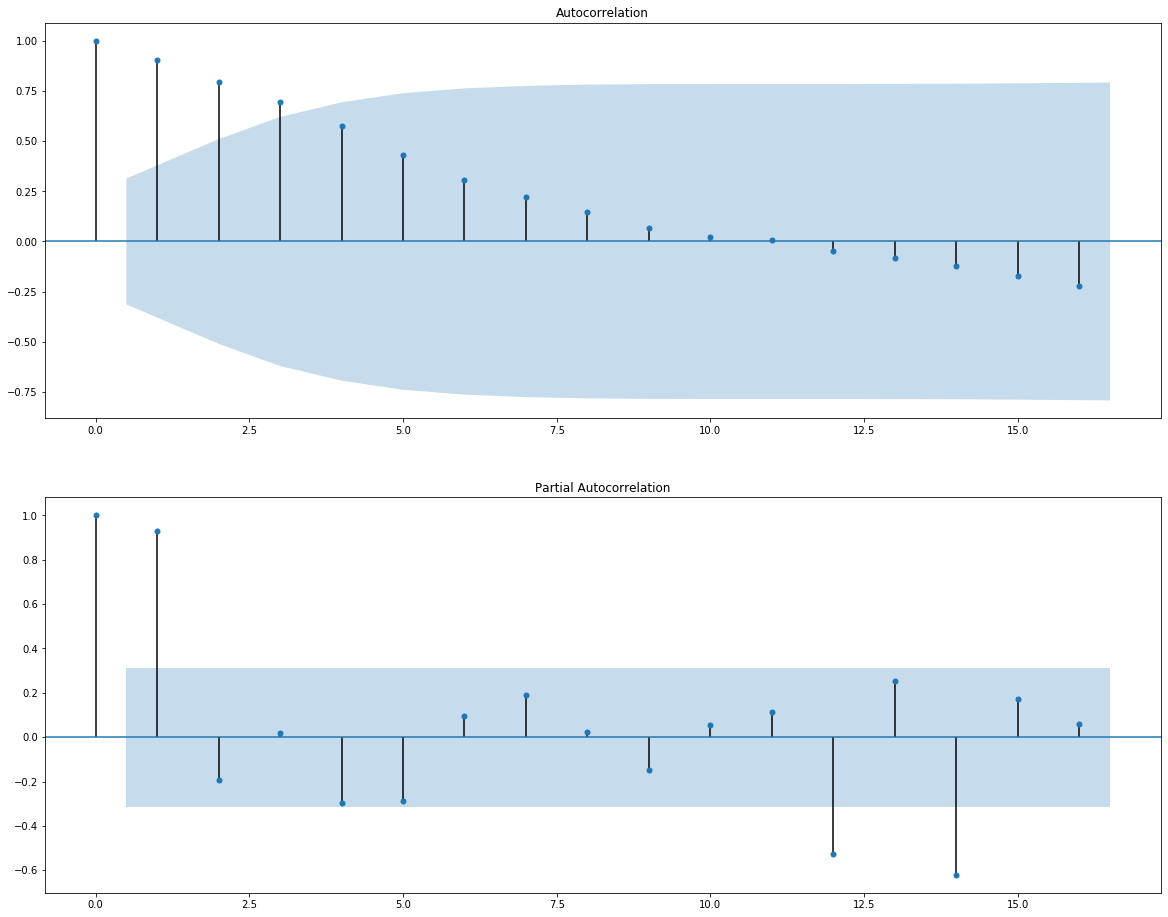

                 0
count    20.000000
mean    834.895950
std    3384.501323
min   -5544.487218
25%   -1000.771135
50%     696.952687
75%    1798.200016
max    9076.085259
Predicted: 48075.925


,기준일,value
0,2012,47255.0
1,2013,48163.0
2,2014,53052.0
3,2015,52606.0
4,2016,49019.0
5,2017,50363.0
6,2018,49295.0
7,2019,48205.0


array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

array([47255., 48163., 53052., 52606., 49019., 50363., 49295., 48205.],
      dtype=float32)

>Predicted=48075.925, Expected=47255
>Predicted=47138.914, Expected=48163
>Predicted=48270.639, Expected=53052
>Predicted=53717.633, Expected=52606
>Predicted=52554.539, Expected=49019
>Predicted=48583.009, Expected=50363
>Predicted=50495.828, Expected=49295
>Predicted=49195.831, Expected=48205
RMSE: 2342.860


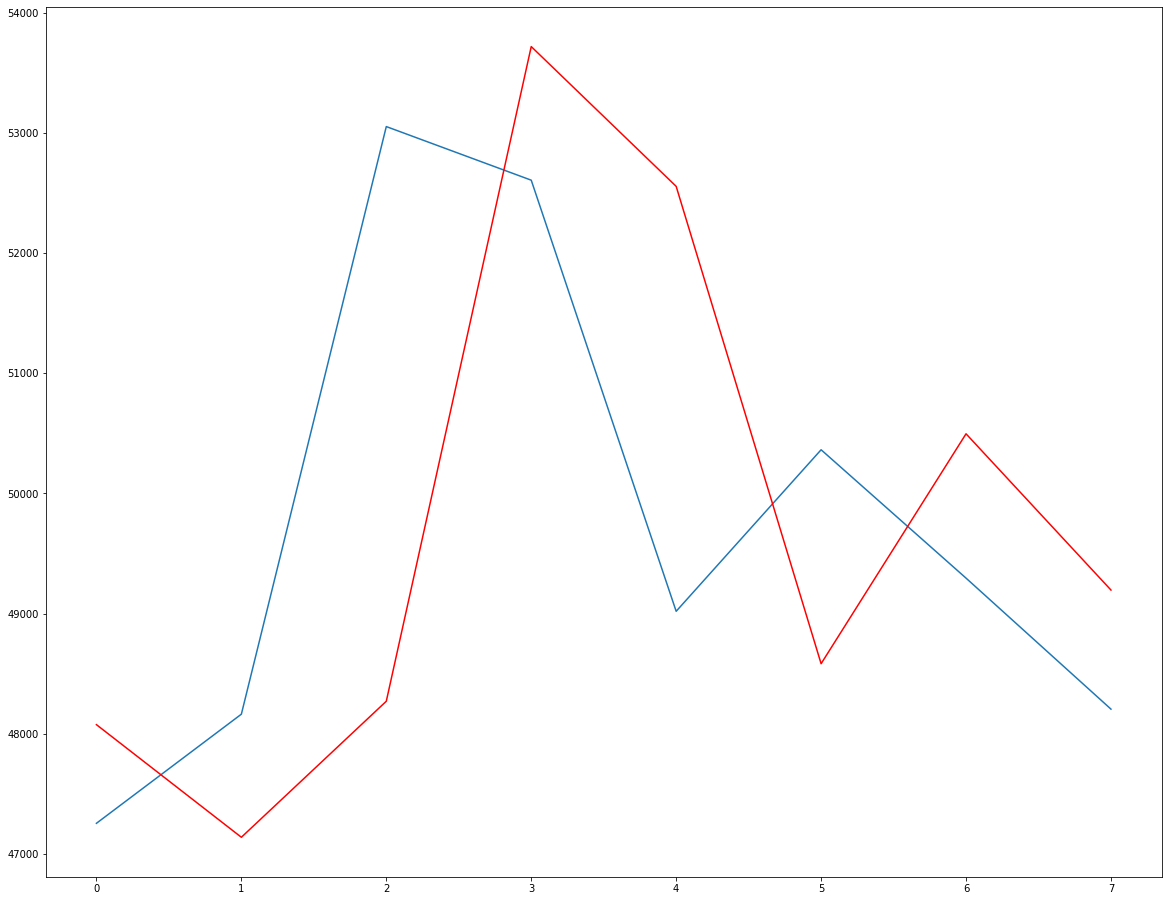

[48075.77171023 48060.45065438 48058.63421966 48058.41886668
 48058.39333485 48058.39030784 48058.38994897 48058.38990642
 48058.38990137 48058.38990077 48058.3899007  48058.3899007 ]
------------------------------------------------------ 1
>Predicted=688307.000, Expected=698107
>Predicted=698107.000, Expected=697052
>Predicted=697052.000, Expected=721390
>Predicted=721390.000, Expected=721519
>Predicted=721519.000, Expected=717176
>Predicted=717176.000, Expected=727886
>Predicted=727886.000, Expected=733947
>Predicted=733947.000, Expected=762720
>Predicted=762720.000, Expected=740032
>Predicted=740032.000, Expected=751654
>Predicted=751654.000, Expected=766756
>Predicted=766756.000, Expected=778666
>Predicted=778666.000, Expected=793982
>Predicted=793982.000, Expected=795247
>Predicted=795247.000, Expected=805329
>Predicted=805329.000, Expected=838448
>Predicted=838448.000, Expected=899308
>Predicted=899308.000, Expected=926623
>Predicted=926623.000, Expected=920044
>Predicted=920044.

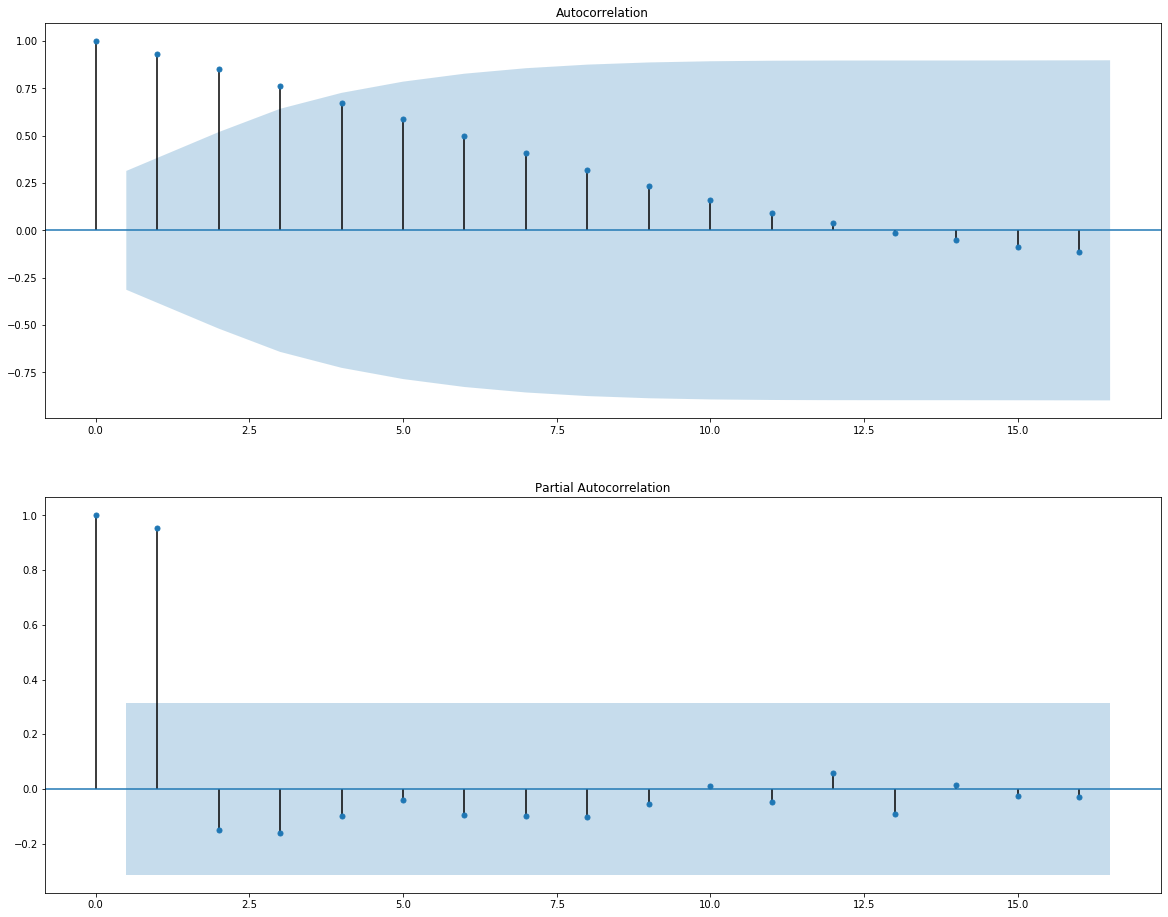

                  0
count     20.000000
mean    8638.467406
std    17703.725278
min   -29352.198332
25%    -2017.662880
50%     9955.726448
75%    15060.683699
max    53861.518167
Predicted: 917812.199


,기준일,value
0,2012,793982.0
1,2013,795247.0
2,2014,805329.0
3,2015,838448.0
4,2016,899308.0
5,2017,926623.0
6,2018,920044.0
7,2019,918480.0


array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

array([793982., 795247., 805329., 838448., 899308., 926623., 920044.,
       918480.], dtype=float32)

>Predicted=917812.199, Expected=793982
>Predicted=740807.359, Expected=795247
>Predicted=795653.994, Expected=805329
>Predicted=808575.366, Expected=838448
>Predicted=849269.339, Expected=899308
>Predicted=920727.636, Expected=926623
>Predicted=936383.274, Expected=920044
>Predicted=917734.512, Expected=918480
RMSE: 52547.268


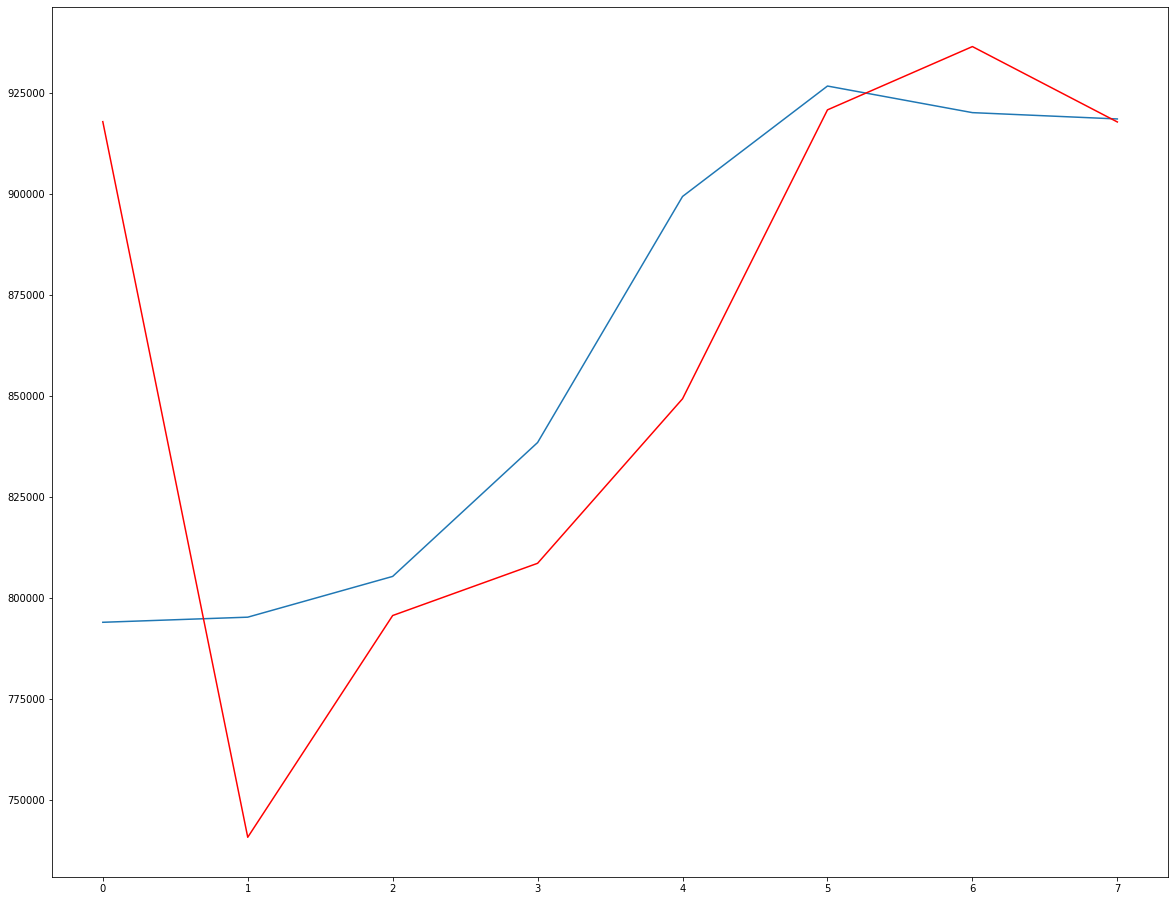

[917812.04582617 917526.77550753 917404.94206763 917352.90936003
 917330.68719621 917321.19653951 917317.14326345 917315.41218758
 917314.67287853 917314.35713392 917314.2222855  917314.16469435]
------------------------------------------------------ 3
>Predicted=214215.000, Expected=239535
>Predicted=239535.000, Expected=257731
>Predicted=257731.000, Expected=278451
>Predicted=278451.000, Expected=293599
>Predicted=293599.000, Expected=312096
>Predicted=312096.000, Expected=332413
>Predicted=332413.000, Expected=348719
>Predicted=348719.000, Expected=368605
>Predicted=368605.000, Expected=385070
>Predicted=385070.000, Expected=394475
>Predicted=394475.000, Expected=434163
>Predicted=434163.000, Expected=455070
>Predicted=455070.000, Expected=466593
>Predicted=466593.000, Expected=474849
>Predicted=474849.000, Expected=477592
>Predicted=477592.000, Expected=483655
>Predicted=483655.000, Expected=497039
>Predicted=497039.000, Expected=507746
>Predicted=507746.000, Expected=526149
>Predi

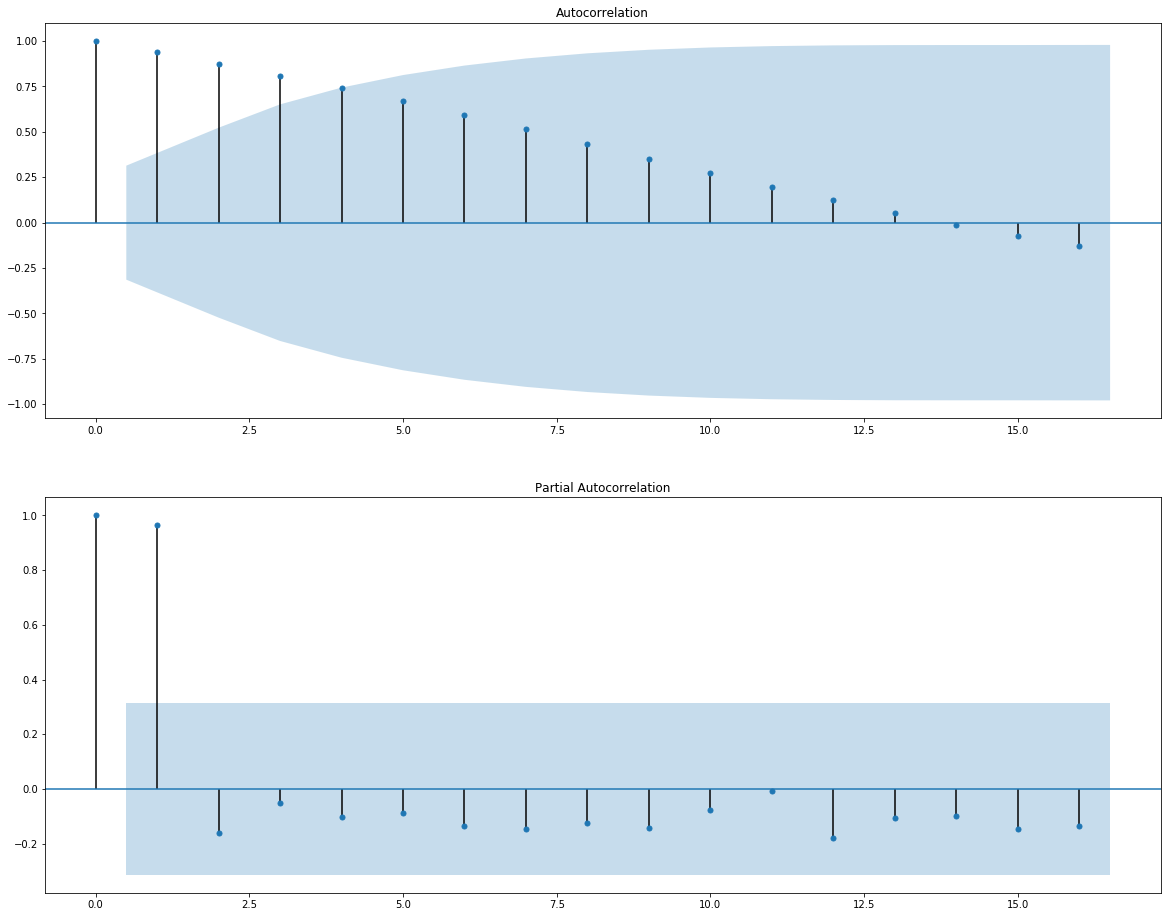

                  0
count     20.000000
mean    8537.220743
std    11448.669203
min   -16415.891361
25%     3506.976389
50%     9471.036700
75%    14588.518906
max    35773.244053
Predicted: 516164.830


,기준일,value
0,2012,466593.0
1,2013,474849.0
2,2014,477592.0
3,2015,483655.0
4,2016,497039.0
5,2017,507746.0
6,2018,526149.0
7,2019,520499.0


array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

array([466593., 474849., 477592., 483655., 497039., 507746., 526149.,
       520499.], dtype=float32)

>Predicted=516164.830, Expected=466593
>Predicted=424380.456, Expected=474849
>Predicted=479523.168, Expected=477592
>Predicted=479142.438, Expected=483655
>Predicted=487089.501, Expected=497039
>Predicted=504686.705, Expected=507746
>Predicted=513901.453, Expected=526149
>Predicted=536917.574, Expected=520499
RMSE: 26354.451


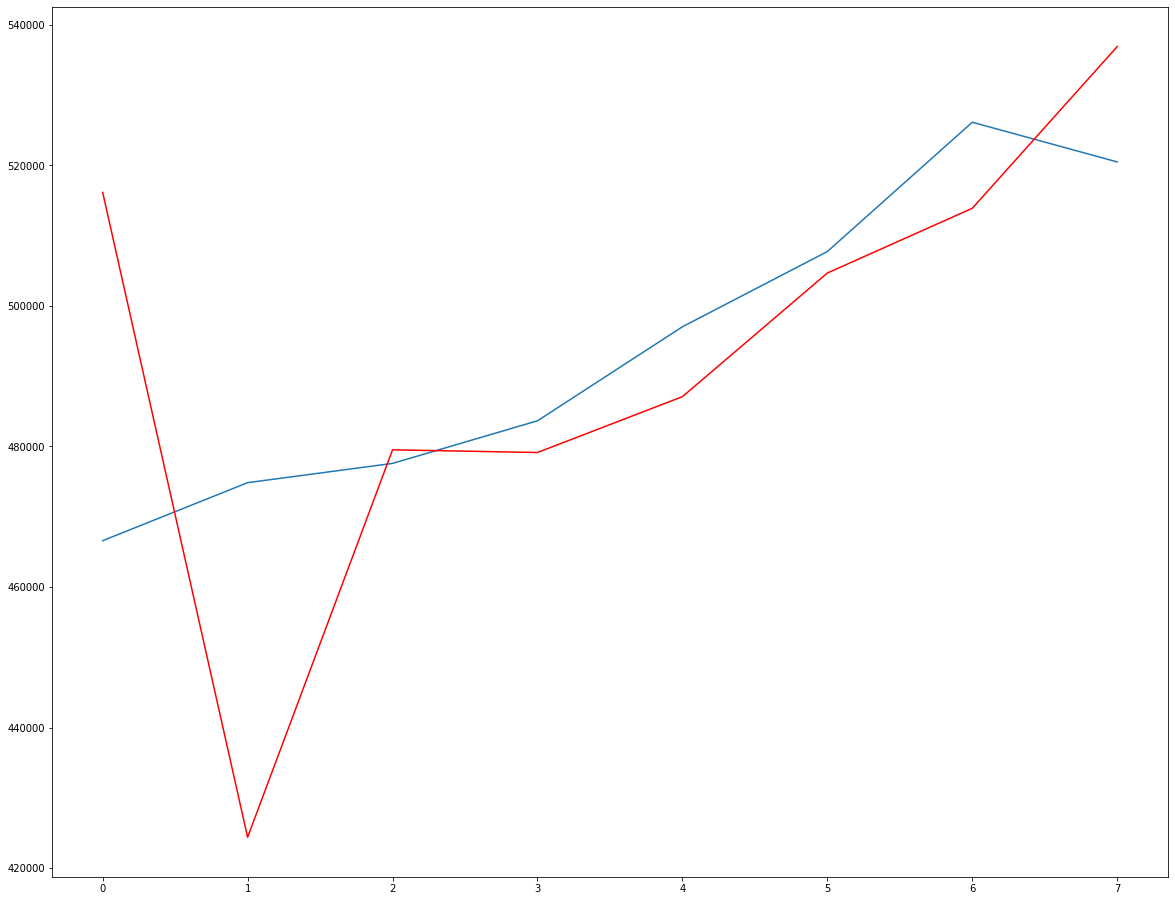

[516164.67616478 512839.65614557 510288.91038949 508332.13903937
 506831.02741055 505679.469196   504796.06632575 504118.37533166
 503598.49352128 503199.67296868 502893.72298158 502659.01743795]
------------------------------------------------------ 4
>Predicted=1033.000, Expected=1167
>Predicted=1167.000, Expected=1218
>Predicted=1218.000, Expected=1316
>Predicted=1316.000, Expected=1523
>Predicted=1523.000, Expected=1449
>Predicted=1449.000, Expected=1652
>Predicted=1652.000, Expected=1549
>Predicted=1549.000, Expected=1576
>Predicted=1576.000, Expected=1668
>Predicted=1668.000, Expected=1709
>Predicted=1709.000, Expected=1939
>Predicted=1939.000, Expected=1976
>Predicted=1976.000, Expected=2102
>Predicted=2102.000, Expected=2070
>Predicted=2070.000, Expected=1528
>Predicted=1528.000, Expected=1967
>Predicted=1967.000, Expected=2183
>Predicted=2183.000, Expected=2441
>Predicted=2441.000, Expected=2682
>Predicted=2682.000, Expected=2646
RMSE: 208.738
Dataset 31, Validation 8
Best ARI

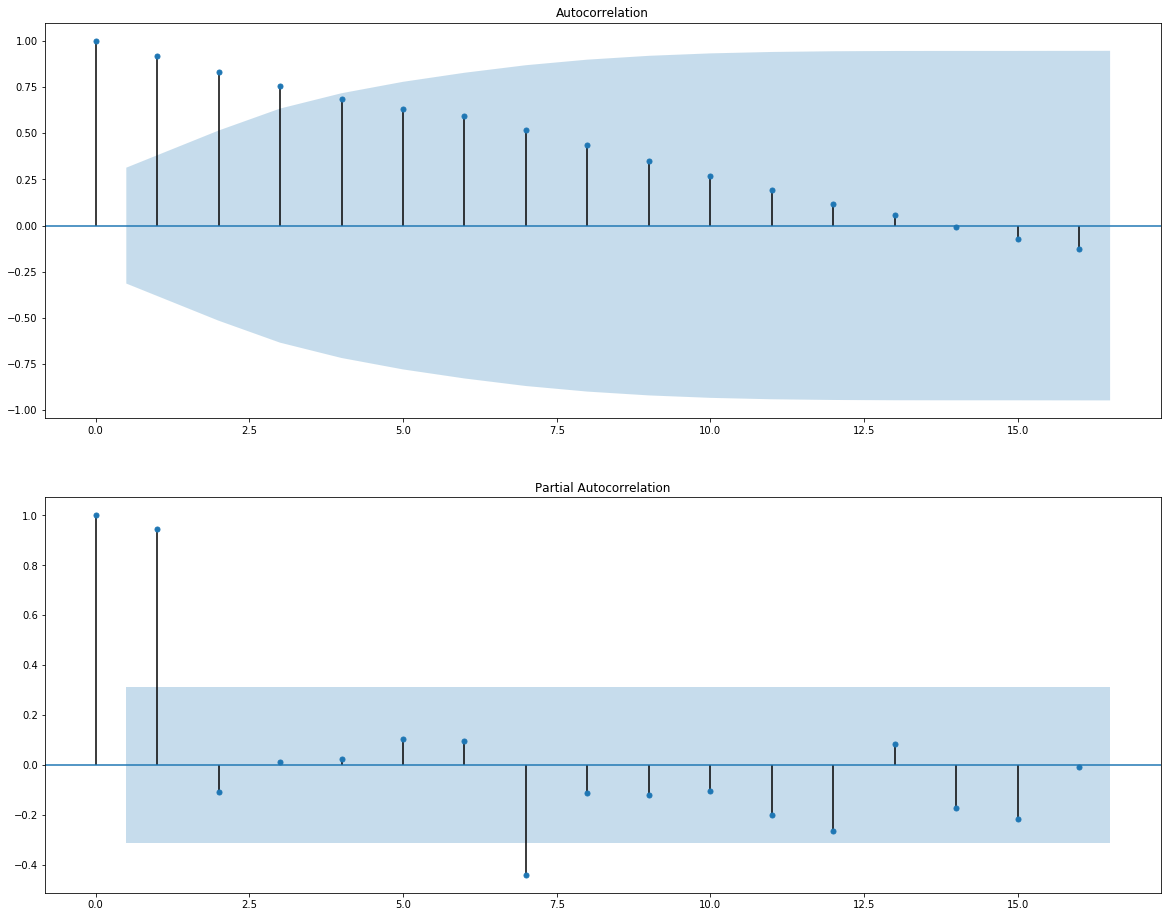

                0
count   20.000000
mean    72.325898
std    222.229322
min   -533.174362
25%    -17.734478
50%     68.662400
75%    226.607198
max    566.012361
Predicted: 2642.673


,기준일,value
0,2012,2102.0
1,2013,2070.0
2,2014,1528.0
3,2015,1967.0
4,2016,2183.0
5,2017,2441.0
6,2018,2682.0
7,2019,2646.0


array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

array([2102., 2070., 1528., 1967., 2183., 2441., 2682., 2646.],
      dtype=float32)

>Predicted=2642.673, Expected=2102
>Predicted=2039.958, Expected=2070
>Predicted=2066.879, Expected=1528
>Predicted=1466.119, Expected=1967
>Predicted=1945.656, Expected=2183
>Predicted=2184.704, Expected=2441
>Predicted=2450.510, Expected=2682
>Predicted=2698.199, Expected=2646
RMSE: 355.815


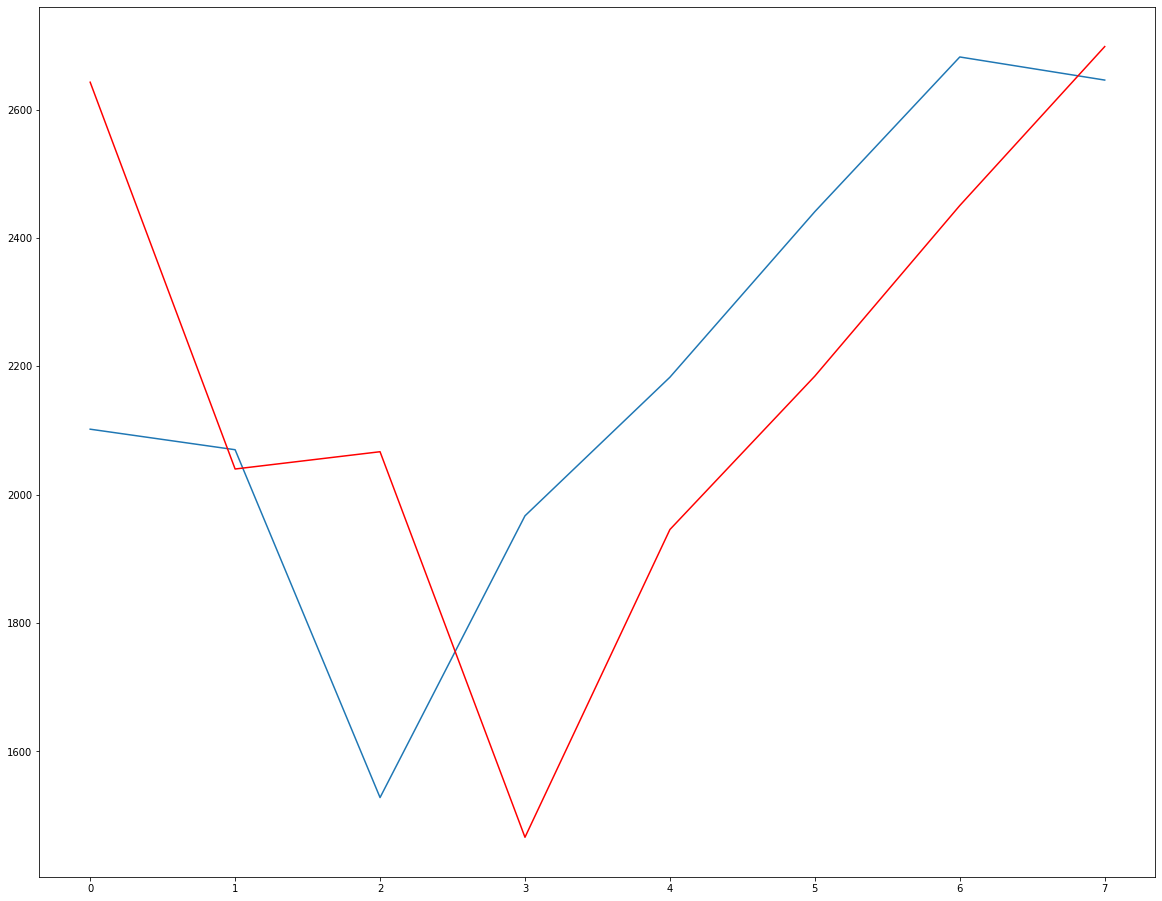

[2642.5194068  2642.18289211 2642.15035681 2642.1472112  2642.14690707
 2642.14687766 2642.14687482 2642.14687455 2642.14687452 2642.14687452
 2642.14687452 2642.14687452]
------------------------------------------------------ 5
>Predicted=1806.000, Expected=2130
>Predicted=2130.000, Expected=2456
>Predicted=2456.000, Expected=2925
>Predicted=2925.000, Expected=3210
>Predicted=3210.000, Expected=3928
>Predicted=3928.000, Expected=3896
>Predicted=3896.000, Expected=4092
>Predicted=4092.000, Expected=4491
>Predicted=4491.000, Expected=4747
>Predicted=4747.000, Expected=4867
>Predicted=4867.000, Expected=5326
>Predicted=5326.000, Expected=4850
>Predicted=4850.000, Expected=6156
>Predicted=6156.000, Expected=6639
>Predicted=6639.000, Expected=6175
>Predicted=6175.000, Expected=7595
>Predicted=7595.000, Expected=7173
>Predicted=7173.000, Expected=8638
>Predicted=8638.000, Expected=9110
>Predicted=9110.000, Expected=8910
RMSE: 651.978
Dataset 31, Validation 8
Best ARIMANone RMSE=inf
ADF Stat

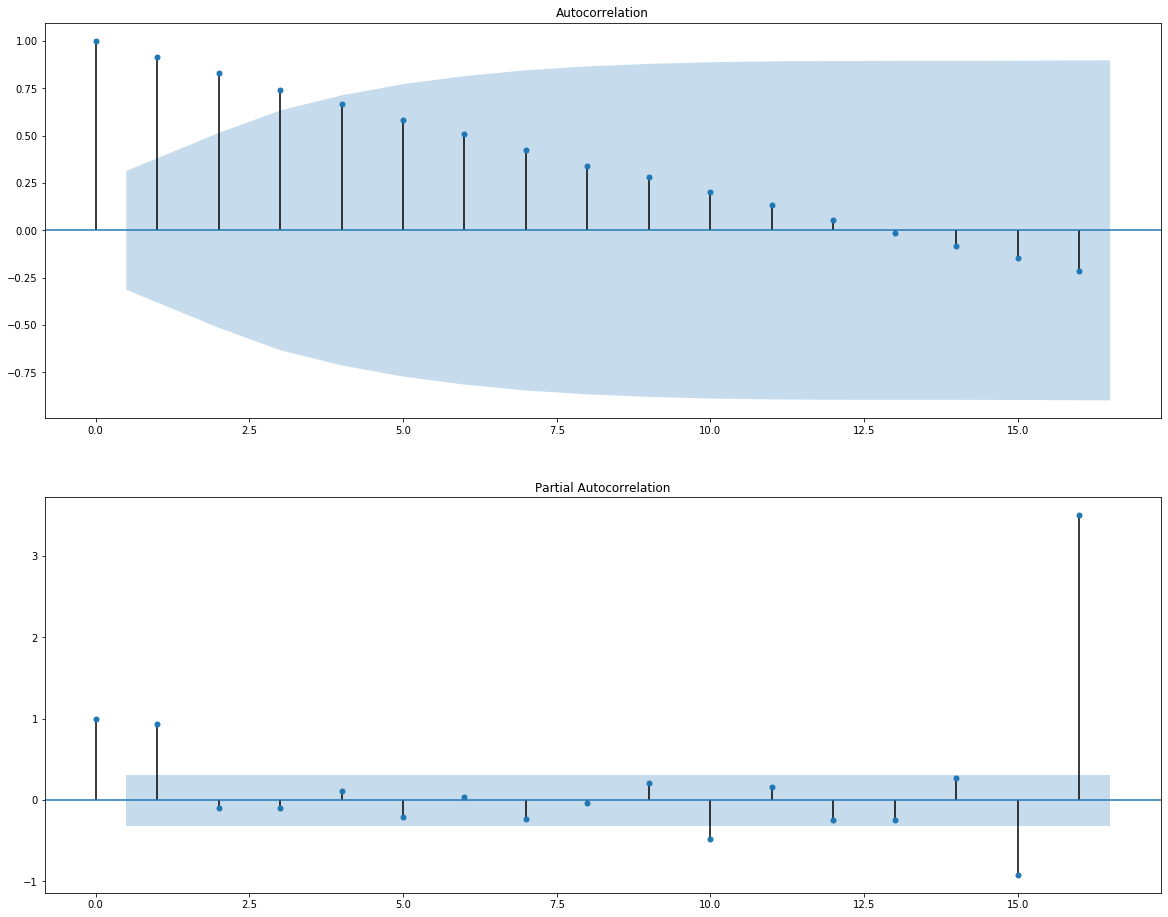

                 0
count    20.000000
mean    284.120268
std     647.838888
min    -674.279181
25%     -45.091013
50%     233.300976
75%     463.549001
max    1534.158629
Predicted: 8915.362


,기준일,value
0,2012,6156.0
1,2013,6639.0
2,2014,6175.0
3,2015,7595.0
4,2016,7173.0
5,2017,8638.0
6,2018,9110.0
7,2019,8910.0


array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

array([6156., 6639., 6175., 7595., 7173., 8638., 9110., 8910.],
      dtype=float32)

>Predicted=8915.362, Expected=6156
>Predicted=6072.042, Expected=6639
>Predicted=6610.601, Expected=6175
>Predicted=6208.121, Expected=7595
>Predicted=7443.421, Expected=7173
>Predicted=7226.397, Expected=8638
>Predicted=8410.311, Expected=9110
>Predicted=9058.457, Expected=8910
RMSE: 1256.287


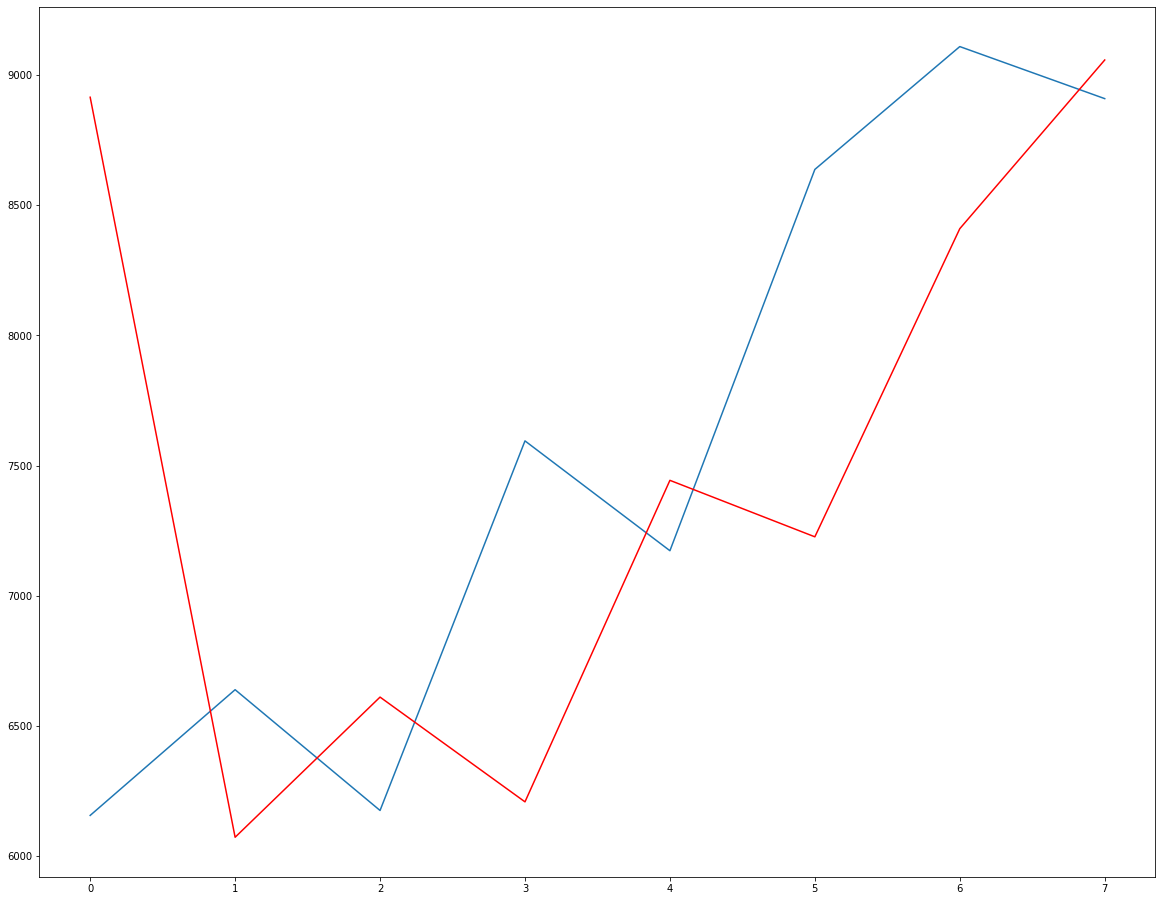

[8915.20879315 8915.07313552 8915.07666858 8915.07657656 8915.07657896
 8915.0765789  8915.0765789  8915.0765789  8915.0765789  8915.0765789
 8915.0765789  8915.0765789 ]
------------------------------------------------------ 6
>Predicted=497513005056.000, Expected=576178028544
>Predicted=576178028544.000, Expected=547658006528
>Predicted=547658006528.000, Expected=627245973504
>Predicted=627245973504.000, Expected=702716968960
>Predicted=702716968960.000, Expected=793174999040
>Predicted=793174999040.000, Expected=934900989952
>Predicted=934900989952.000, Expected=1053220012032
>Predicted=1053220012032.000, Expected=1172609957888
>Predicted=1172609957888.000, Expected=1047339991040
>Predicted=1047339991040.000, Expected=943942008832
>Predicted=943942008832.000, Expected=1144069947392
>Predicted=1144069947392.000, Expected=1253220024320
>Predicted=1253220024320.000, Expected=1278430019584
>Predicted=1278430019584.000, Expected=1370799996928
>Predicted=1370799996928.000, Expected=148432

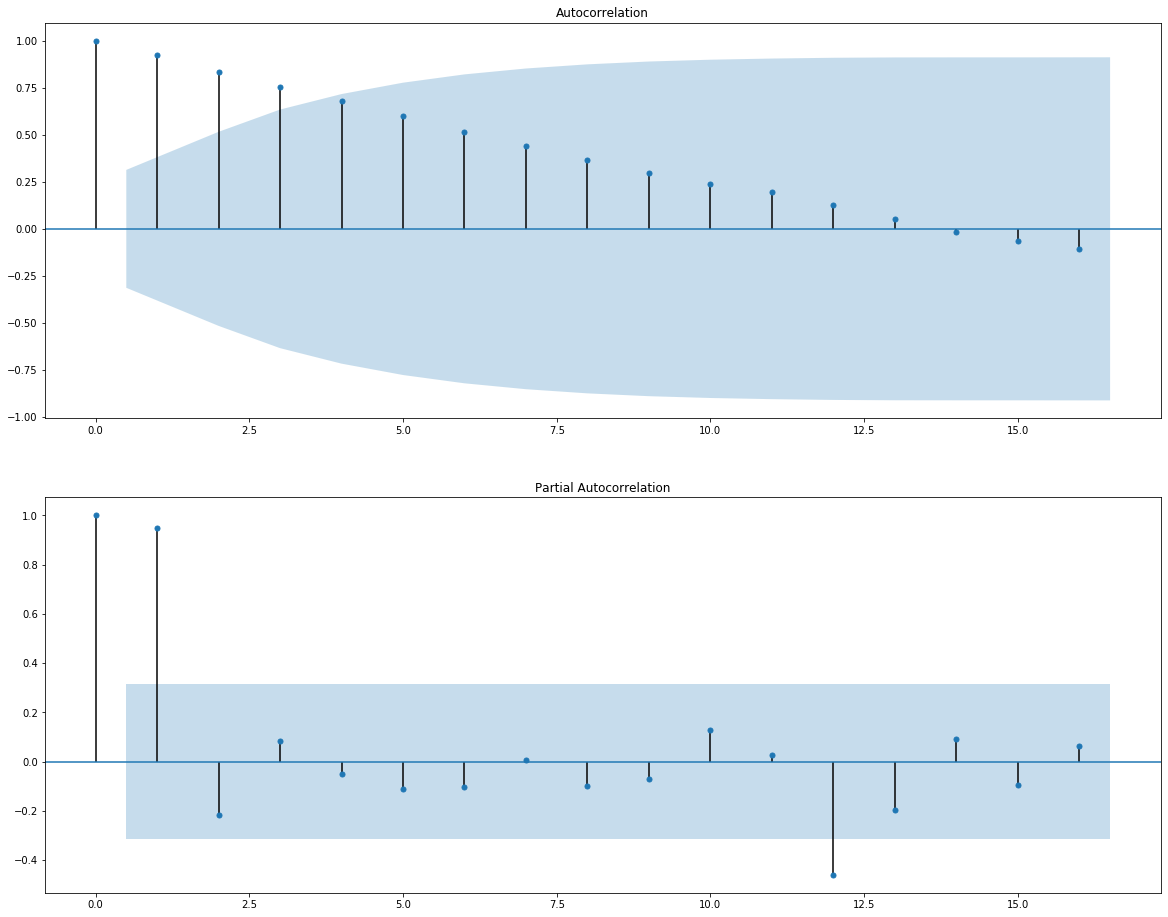

                  0
count  2.000000e+01
mean   3.627308e+10
std    8.537088e+10
min   -1.690991e+11
25%   -1.468997e+10
50%    6.351294e+10
75%    7.920266e+10
max    2.127469e+11
Predicted: 1622153885669.464


,기준일,value
0,2012,1.278430e+12
1,2013,1.370800e+12
2,2014,1.484320e+12
3,2015,1.465770e+12
4,2016,1.500110e+12
5,2017,1.623900e+12
6,2018,1.724850e+12
7,2019,1.646740e+12


array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

array([1.27843e+12, 1.37080e+12, 1.48432e+12, 1.46577e+12, 1.50011e+12,
       1.62390e+12, 1.72485e+12, 1.64674e+12], dtype=float32)

>Predicted=1622153885669.464, Expected=1278430019584
>Predicted=1130962064036.783, Expected=1370799996928
>Predicted=1389052814822.683, Expected=1484320014336
>Predicted=1509004679652.694, Expected=1465770049536
>Predicted=1461933913711.452, Expected=1500109996032
>Predicted=1507161498878.565, Expected=1623900028928
>Predicted=1650398541981.701, Expected=1724849979392
>Predicted=1748429706473.017, Expected=1646739980288
RMSE: 164917599621.068


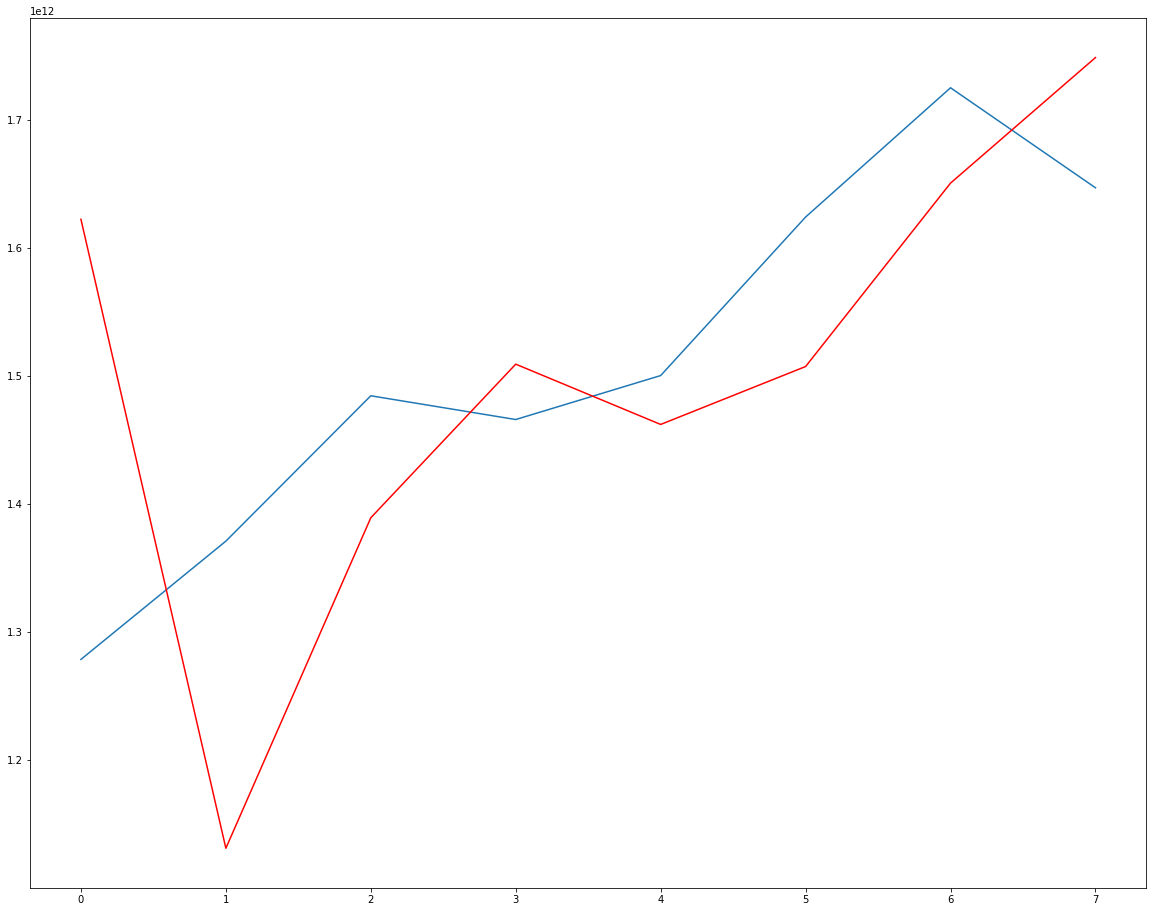

[1.62215389e+12 1.61441511e+12 1.61197923e+12 1.61121251e+12
 1.61097117e+12 1.61089521e+12 1.61087130e+12 1.61086377e+12
 1.61086140e+12 1.61086066e+12 1.61086042e+12 1.61086035e+12]
------------------------------------------------------ 7
>Predicted=400940.000, Expected=455690
>Predicted=455690.000, Expected=470520
>Predicted=470520.000, Expected=461940
>Predicted=461940.000, Expected=464610
>Predicted=464610.000, Expected=484900
>Predicted=484900.000, Expected=480080
>Predicted=480080.000, Expected=486940
>Predicted=486940.000, Expected=501500
>Predicted=501500.000, Expected=513190
>Predicted=513190.000, Expected=525390
>Predicted=525390.000, Expected=574260
>Predicted=574260.000, Expected=597290
>Predicted=597290.000, Expected=598960
>Predicted=598960.000, Expected=597640
>Predicted=597640.000, Expected=586000
>Predicted=586000.000, Expected=606510
>Predicted=606510.000, Expected=614780
>Predicted=614780.000, Expected=625350
>Predicted=625350.000, Expected=630870
>Predicted=630870.

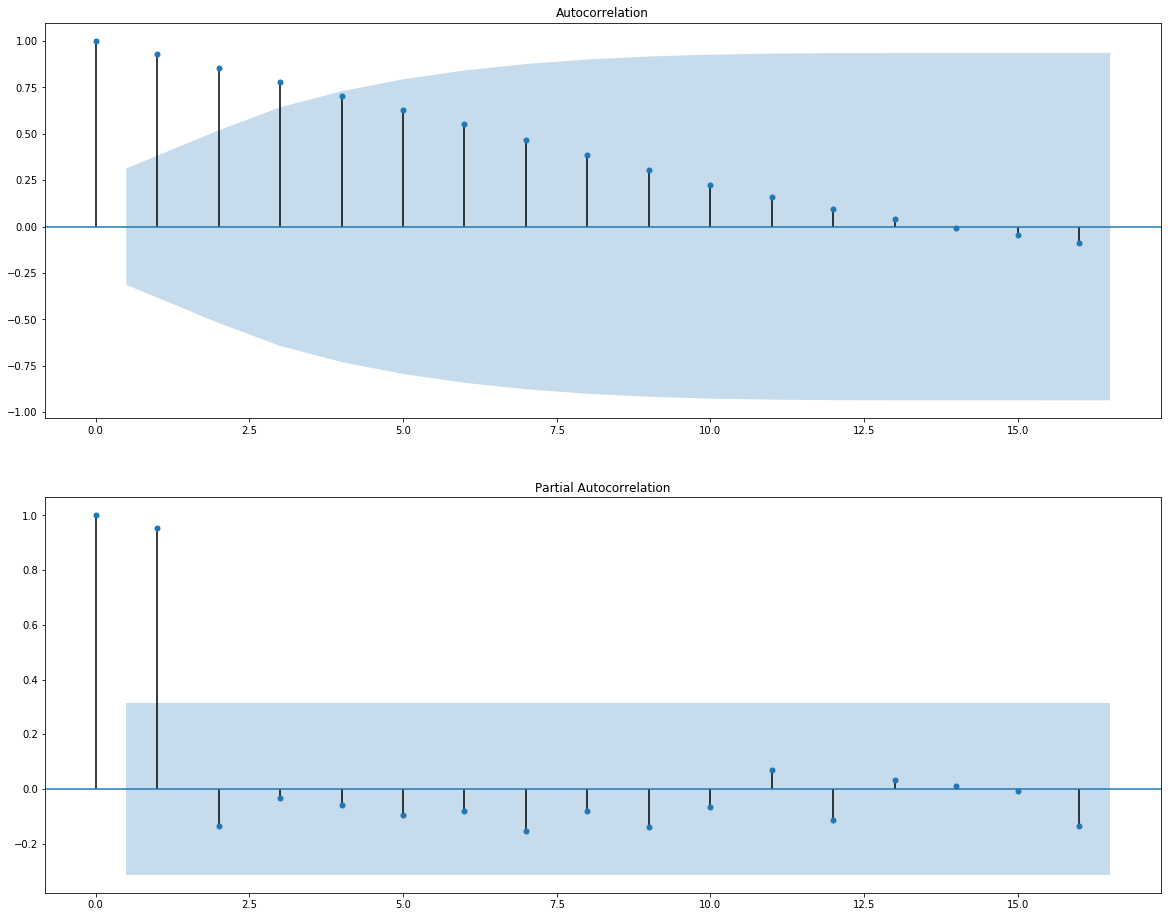

                  0
count     20.000000
mean    8397.383279
std    16312.103398
min   -11246.554830
25%     -776.840858
50%     6439.860821
75%    10880.015977
max    49653.923607
Predicted: 625750.129


,기준일,value
0,2012,598960.0
1,2013,597640.0
2,2014,586000.0
3,2015,606510.0
4,2016,614780.0
5,2017,625350.0
6,2018,630870.0
7,2019,627035.0


array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

array([598960., 597640., 586000., 606510., 614780., 625350., 630870.,
       627035.], dtype=float32)

>Predicted=625750.129, Expected=598960
>Predicted=589416.662, Expected=597640
>Predicted=597205.417, Expected=586000
>Predicted=582156.894, Expected=606510
>Predicted=613011.308, Expected=614780
>Predicted=617416.595, Expected=625350
>Predicted=628752.798, Expected=630870
>Predicted=632653.571, Expected=627035
RMSE: 14169.013


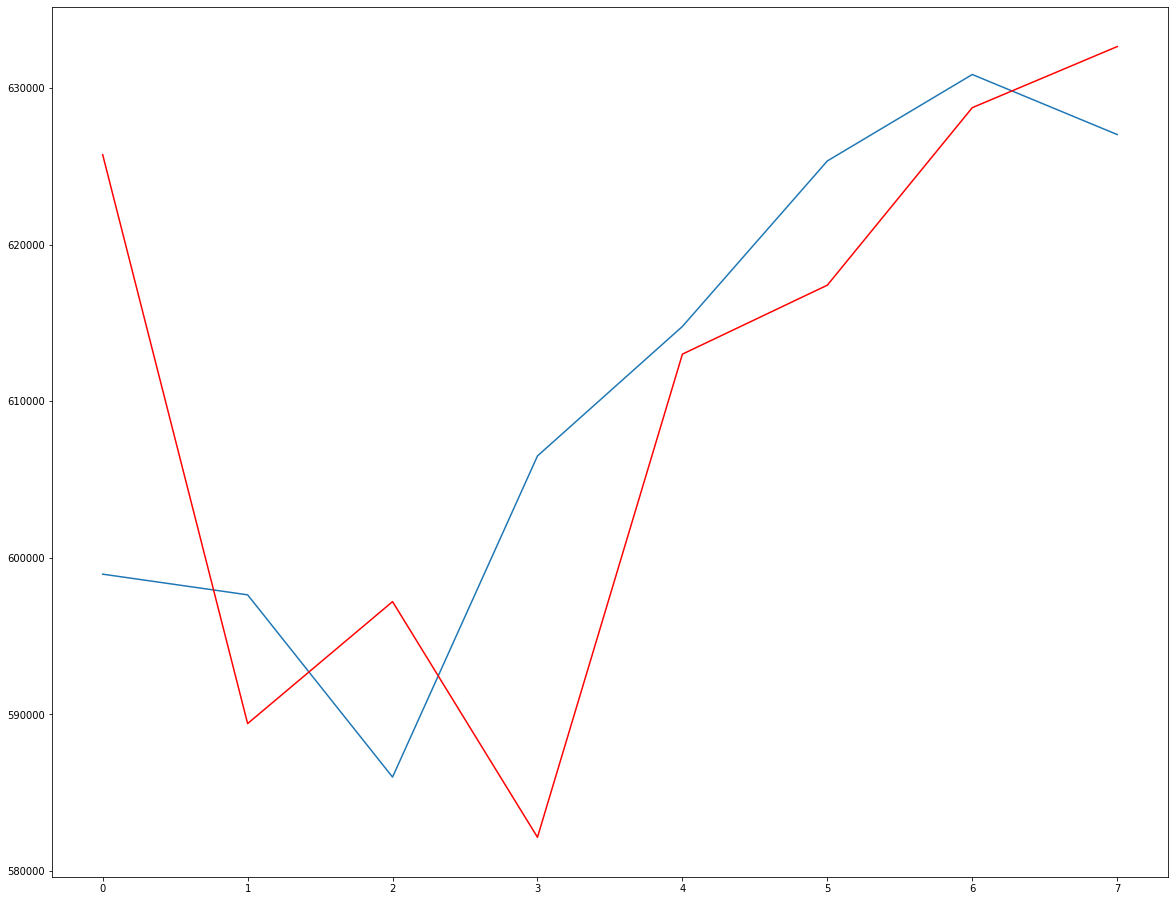

[625749.97572653 625319.39231496 625175.11327046 625126.7685314
 625110.56927111 625105.14125477 625103.3224457  625102.71300273
 625102.50879178 625102.44036517 625102.41743692 625102.40975416]
[array([48075.77171023, 48060.45065438, 48058.63421966, 48058.41886668,
       48058.39333485, 48058.39030784, 48058.38994897, 48058.38990642,
       48058.38990137, 48058.38990077, 48058.3899007 , 48058.3899007 ]), array([917812.04582617, 917526.77550753, 917404.94206763, 917352.90936003,
       917330.68719621, 917321.19653951, 917317.14326345, 917315.41218758,
       917314.67287853, 917314.35713392, 917314.2222855 , 917314.16469435]), array([516164.67616478, 512839.65614557, 510288.91038949, 508332.13903937,
       506831.02741055, 505679.469196  , 504796.06632575, 504118.37533166,
       503598.49352128, 503199.67296868, 502893.72298158, 502659.01743795]), array([2642.5194068 , 2642.18289211, 2642.15035681, 2642.1472112 ,
       2642.14690707, 2642.14687766, 2642.14687482, 2642.14687455,
 

In [975]:
forecast = []
for idx , i in enumerate(coal_oil_etc_data):
    if idx == 2:
        continue
    print('------------------------------------------------------' , idx)
    forecast.append(simple_forecast(i))
    
print(forecast)

In [969]:
total_data

,석탄합(천ton),석유합(천ton),천연가스 (천ton),전력 (GWh),열에너지 (천toe),신재생 및 기타 (천toe),gdp_value,co2_value
대상연도,,,,,,,,
1981,26970.0,131230.0,0.0,35424.0,0.0,2492.0,7.293335e+10,139742.036
1982,27042.0,128898.0,0.0,37880.0,0.0,2417.0,7.835887e+10,141905.566
1983,28708.0,140176.0,0.0,42620.0,0.0,2378.0,8.776036e+10,150904.384
1984,31411.0,152559.0,0.0,47051.0,0.0,2492.0,9.751024e+10,163911.233
1985,33615.0,159929.0,0.0,50733.0,0.0,2031.0,1.012960e+11,178333.544
1986,35230.0,179142.0,0.0,56310.0,0.0,1480.0,1.168370e+11,182451.585
1987,36418.0,202088.0,0.0,64169.0,10.0,1319.0,1.479480e+11,192660.513
1988,37920.0,231911.0,0.0,74317.0,63.0,1164.0,1.995910e+11,221959.843
1989,36473.0,263974.0,0.0,82192.0,71.0,1033.0,2.469270e+11,235846.772


In [ ]:
[48075.77171023 48060.45065438 48058.63421966 48058.41886668
 48058.39333485 48058.39030784 48058.38994897 48058.38990642
 48058.38990137 48058.38990077 48058.3899007  48058.3899007 ]

[917812.04582617 917526.77550753 917404.94206763 917352.90936003
 917330.68719621 917321.19653951 917317.14326345 917315.41218758
 917314.67287853 917314.35713392 917314.2222855  917314.16469435]

[516164.67616478 512839.65614557 510288.91038949 508332.13903937
 506831.02741055 505679.469196   504796.06632575 504118.37533166
 503598.49352128 503199.67296868 502893.72298158 502659.01743795]

[2642.5194068  2642.18289211 2642.15035681 2642.1472112  2642.14690707
 2642.14687766 2642.14687482 2642.14687455 2642.14687452 2642.14687452
 2642.14687452 2642.14687452]

[8915.20879315 8915.07313552 8915.07666858 8915.07657656 8915.07657896
 8915.0765789  8915.0765789  8915.0765789  8915.0765789  8915.0765789
 8915.0765789  8915.0765789 ]

[1.62215389e+12 1.61441511e+12 1.61197923e+12 1.61121251e+12
 1.61097117e+12 1.61089521e+12 1.61087130e+12 1.61086377e+12
 1.61086140e+12 1.61086066e+12 1.61086042e+12 1.61086035e+12]

[625749.97572653 625319.39231496 625175.11327046 625126.7685314
 625110.56927111 625105.14125477 625103.3224457  625102.71300273
 625102.50879178 625102.44036517 625102.41743692 625102.40975416]